# 수정사항
* 계산식을 코드로 바로 입력
* Nan data table 수정( 완료 )
* 추가데이터와 비교 (ex. 3월, 12월 \
             코로나 확진자 증가, 거리두기 단계 변화와 비교 )
* plot -> pointplot 로 변경
* heatmap(corr)
    *시간 -> 지역
    *요일 -> 월~일
    ----------------------------------
*ppt 제작
*

- 주제 선정 동기, 개요, 목적등
 * 대중교통이 감소하였고, 그럼 일반 자동차 통행량이 증가하였을까?
    

- 데이터 수집 방법

- 데이터 처리 및 분석

    - 분석 방법 : 빈도분석, 기술통계분석, 상관계수분석.

    가설 1
    데이터 설명 및 인사이트 도출 과정 (아주 간단히) 및 시각화
    결론 1

    가설 2
    데이터 설명 및 인사이트 도출 과정 (아주 간단히) 및 시각화
    결론 2

    …

- 추후 개선 및 느낀점

In [1]:
pwd

'/Users/ijiyeong/seoultraffic/final'

In [2]:
%cd

/Users/ijiyeong


In [3]:
%cd seoultraffic/

/Users/ijiyeong/seoultraffic


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
import seaborn as sns
import matplotlib.font_manager as fm
import missingno as msno #결측데이터 검색
import warnings
import time
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [5]:
# 폰트설정
from matplotlib import font_manager
plt.rcParams["font.family"] = 'NanumGothicCoding'
from matplotlib import rc
rc('font', family="Arial Unicode MS")

In [6]:
### 2019 pub_transpor data road
df1 = pd.read_csv("2019.csv")
### 2020 pub_transpor data road
df2 = pd.read_csv("2020.csv")
### 2019 Traffic data road
ddf1 = pd.read_csv("data_2019_seoultraffic.csv")
### 2019 Traffic data road
ddf2 = pd.read_csv("data_2020_seoultraffic.csv")

### 월별 Pub_transpor data 2019

In [7]:
pub_traffic_m_2019 = df1.pivot_table("count", "월", "시간", aggfunc=np.sum)
pub_traffic_m_2019.tail(1)

시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
월,,,,,,,,,,,,,,,,,,,,,
2019-12,5374999,894129,284658,205711,1508785,7102122,15312007,36548547,61293678,42821402,...,36315505,39572005,44295328,51354740,63240031,45627653,32970482,31787814,29838776,17951621


In [8]:
pub_traffic_m_2019.loc[:, "total"] = pub_traffic_m_2019.sum(axis=1)
pub_traffic_m_2019.tail(1)

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
월,,,,,,,,,,,,,,,,,,,,,
2019-12,5374999,894129,284658,205711,1508785,7102122,15312007,36548547,61293678,42821402,...,39572005,44295328,51354740,63240031,45627653,32970482,31787814,29838776,17951621,697837963


### 지역 Pub_transpor data 2019

In [9]:
pub_traffic_r_2019 = df1.pivot_table("count", "지명", "시간", aggfunc=np.sum)
pub_traffic_r_2019.tail(1)

시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
지명,,,,,,,,,,,,,,,,,,,,,
중랑구,1429246,237634,75320,66496,865449,3163495,6457136,15182553,22283249,13902473,...,9500318,10034266,11444769,12500258,14244402,12439521,8442147,7587105,6741702,3980054


In [10]:
pub_traffic_r_2019.loc[:, "total"] = pub_traffic_r_2019.sum(axis=1)
pub_traffic_r_2019.tail(1)

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
지명,,,,,,,,,,,,,,,,,,,,,
중랑구,1429246,237634,75320,66496,865449,3163495,6457136,15182553,22283249,13902473,...,10034266,11444769,12500258,14244402,12439521,8442147,7587105,6741702,3980054,199074236


### 월별 일반_transpor data 2019

In [11]:
all_traffic_m_2019 = ddf1.pivot_table("total", "month")
all_traffic_m_2019.tail(2)

,total
month,
11,72354.783704
12,71778.392115


In [12]:
all_traffic_m_2019.loc[:, "total"] = all_traffic_m_2019.sum(axis=1)
all_traffic_m_2019.tail(2)

,total
month,
11,72354.783704
12,71778.392115


### 지역 일반_transpor data 2019

In [13]:
all_traffic_r_2019 = ddf1.pivot_table("total", "구")
all_traffic_r_2019.tail(2)

,total
구,
영등포구,70866.447123
중구,37562.815068


### 월별 Pub_transpor data 2020

In [14]:
pub_traffic_m_2020 = df2.pivot_table("count", "월", "시간", aggfunc=np.sum)
pub_traffic_m_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
월,,,,,,,,,,,,,,,,,,,,,
2020-11,2098081,349867,155377,130386,1329355,6136505,13402605,32537726,52019524,33591727,...,25337088,27905265,31454781,38669351,50479289,34838703,23676409,22284310,18204449,9614244
2020-12,768884,144747,81844,79404,1185775,5460206,11851038,27047114,44277285,28695709,...,21300746,23283325,25506856,31762247,41623937,28400927,19939147,19568978,9363563,4006368


In [15]:
pub_traffic_m_2020.loc[:, "total"] = pub_traffic_m_2020.sum(axis=1)
pub_traffic_m_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
월,,,,,,,,,,,,,,,,,,,,,
2020-11,2098081,349867,155377,130386,1329355,6136505,13402605,32537726,52019524,33591727,...,27905265,31454781,38669351,50479289,34838703,23676409,22284310,18204449,9614244,516629667
2020-12,768884,144747,81844,79404,1185775,5460206,11851038,27047114,44277285,28695709,...,23283325,25506856,31762247,41623937,28400927,19939147,19568978,9363563,4006368,421314351


### 지역 Pub_transpor data 2020

In [16]:
pub_traffic_r_2020 = df2.pivot_table("count", "지명", "시간", aggfunc=np.sum)
pub_traffic_r_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
지명,,,,,,,,,,,,,,,,,,,,,
중구,1030686,267406,125901,144638,524518,2845992,6134273,15971819,33999864,20472449,...,14554400,15679344,17012446,23538009,33093127,18656846,13260295,11477169,8628758,4649330
중랑구,999460,179205,71499,63145,722886,2550547,4890796,10808463,14961209,8788647,...,7304112,8024669,8997200,10484633,13326202,11698006,7464722,6621289,5495151,3253670


In [17]:
pub_traffic_r_2020.loc[:, "total"] = pub_traffic_r_2020.sum(axis=1)
pub_traffic_r_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
지명,,,,,,,,,,,,,,,,,,,,,
중구,1030686,267406,125901,144638,524518,2845992,6134273,15971819,33999864,20472449,...,15679344,17012446,23538009,33093127,18656846,13260295,11477169,8628758,4649330,295154710
중랑구,999460,179205,71499,63145,722886,2550547,4890796,10808463,14961209,8788647,...,8024669,8997200,10484633,13326202,11698006,7464722,6621289,5495151,3253670,153829883


### 월별 일반_transpor data 2020

In [18]:
all_traffic_m_2020 = ddf2.pivot_table("total", "month")
all_traffic_m_2020.tail(2)

,total
month,
11,65578.097531
12,59918.407885


In [19]:
all_traffic_m_2020.loc[:, "total"] = all_traffic_m_2020.sum(axis=1)
all_traffic_m_2020.tail(2)

,total
month,
11,65578.097531
12,59918.407885


### 지역 일반_transpor data 2020

In [20]:
all_traffic_r_2020 = ddf2.pivot_table("total", "구")
all_traffic_r_2020.tail(2)

,total
구,
영등포구,61907.190164
중구,31362.805328


###  * 결측 데이터 검색

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219000 entries, 0 to 218999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   날짜      219000 non-null  object
 1   시간      219000 non-null  int64 
 2   지명      219000 non-null  object
 3   발생량     219000 non-null  int64 
 4   도착량     219000 non-null  int64 
 5   count   219000 non-null  int64 
 6   월       219000 non-null  object
dtypes: int64(4), object(3)
memory usage: 11.7+ MB


In [23]:
df1.isna().sum()

날짜       0
시간       0
지명       0
발생량      0
도착량      0
count    0
월        0
dtype: int64

In [24]:
df2.isna().sum()

날짜       0
시간       0
지명       0
발생량      0
도착량      0
count    0
월        0
dtype: int64

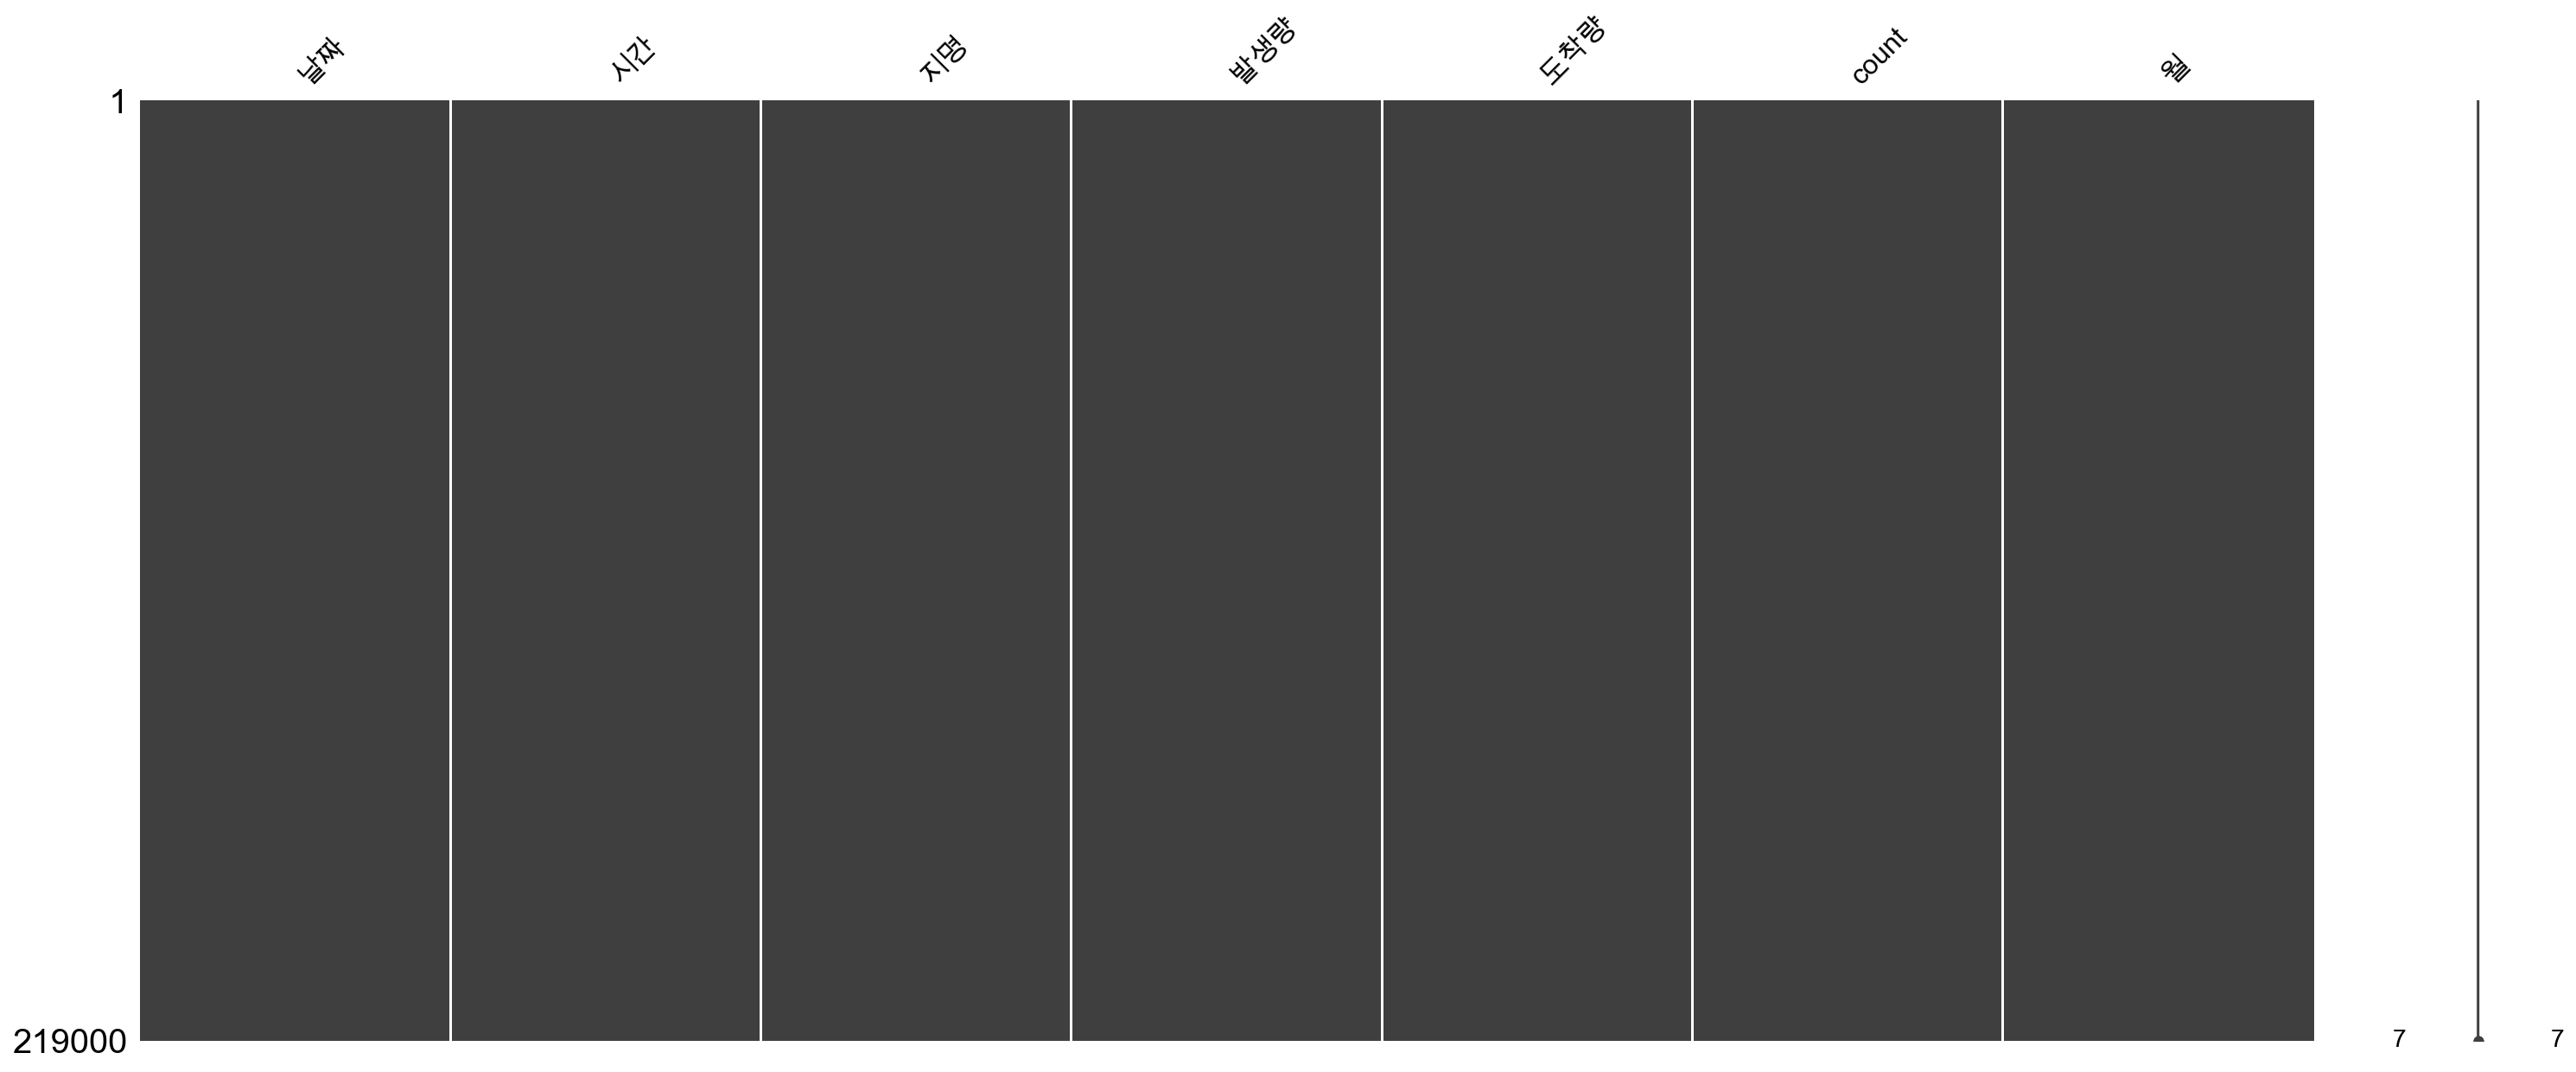

In [25]:
msno.matrix(df1)
plt.show()

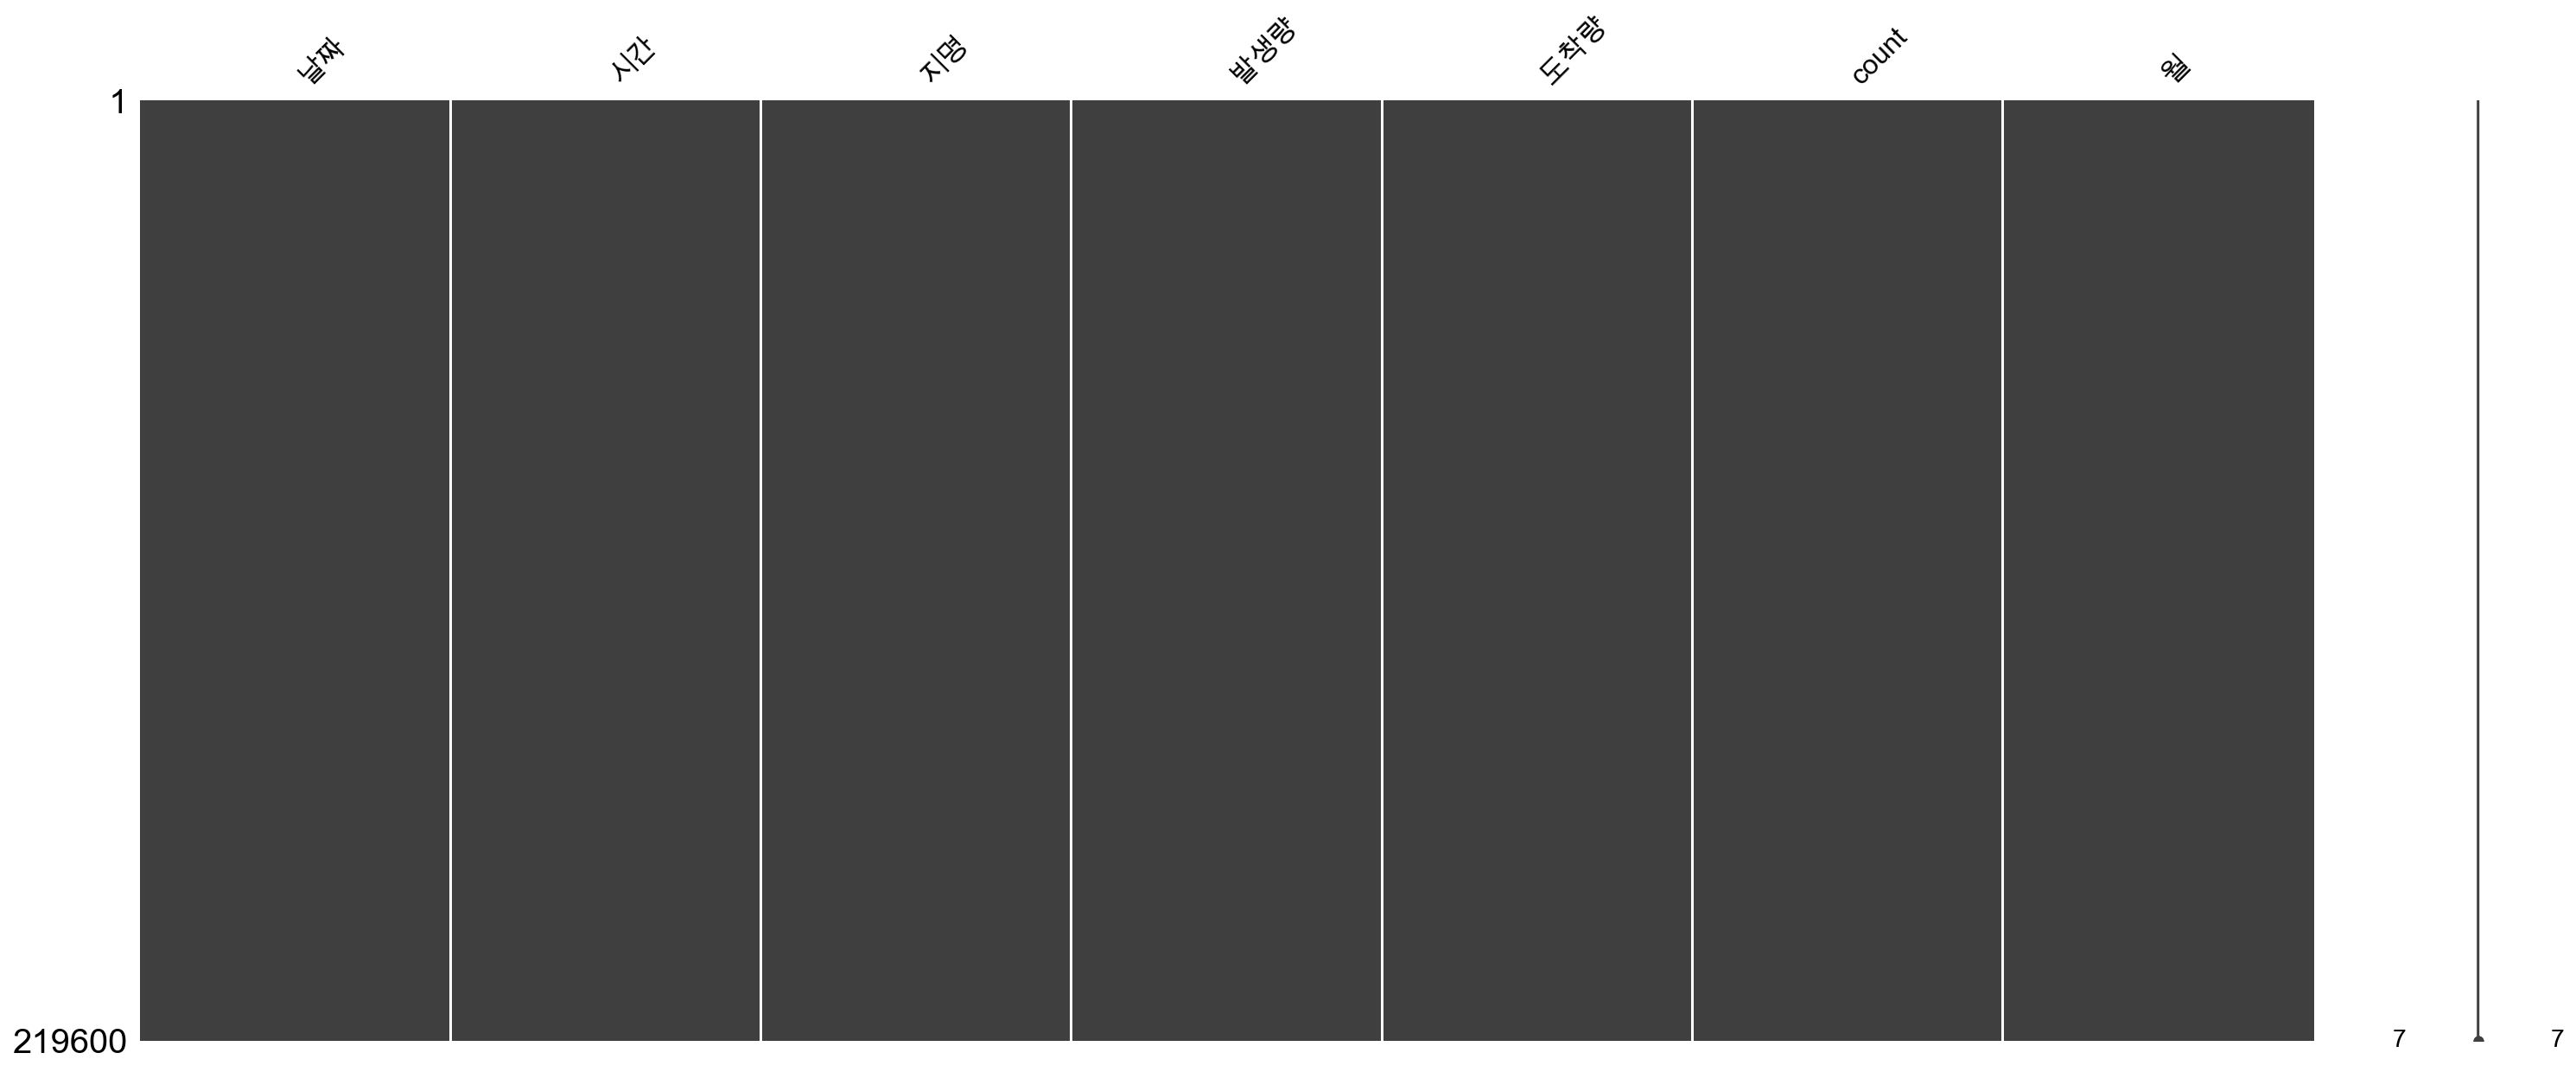

In [27]:
msno.matrix(df2)
plt.show()

# 2019_2020 서울 전체 교통량 비교

## 대중교통량 비교

In [121]:
y1 = pub_traffic_m_2019["total"].sum() 
y2 = pub_traffic_m_2020["total"].sum()
pub_rate_2019 = round(((y2 - y1) / y1 * 100), 2) # 감소량

In [122]:
pub_tans_2019 = round(pub_traffic_m_2019["total"].mean())
print("2019년 평균 통행량 :", pub_tans_2019,"대")

2019년 평균 통행량 : 676359867 대


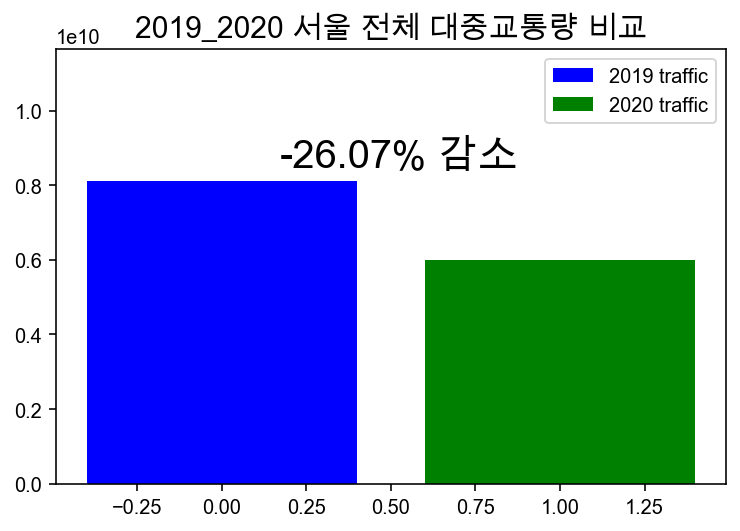

In [123]:
x1 = 0
x2 = 1
y1 = pub_traffic_m_2019["total"].sum() #2019 Total 교통량
y2 = pub_traffic_m_2020["total"].sum() #2020 Total 교통량

plt.bar(x1,y1, label='2019 traffic', color='b')
plt.bar(x2,y2, label='2020 traffic', color='g')
plt.legend()
plt.ylim([0,70*1000000000/6])
plt.text(0.17,85*100000000,pub_rate_2019,fontsize=20)
plt.text(0.5,85*100000000,"% 감소",fontsize=20)
plt.title("2019_2020 서울 전체 대중교통량 비교", fontsize = 15)

plt.show()

## 전체 차량 통행량 비교

In [124]:
y_1 = all_traffic_m_2019["total"].sum()
y_2 = all_traffic_m_2020["total"].sum()
all_rate_2019 = round(((y_2 - y_1) / y_1 * 100), 2) # 감소량
all_rate_2019

-5.73

In [32]:
y_1 = all_traffic_m_2019["total"].sum() 
y_2 = all_traffic_m_2020["total"].sum()
all_rate_2019 = round(((y_2 - y_1) / y_1 * 100), 2) # 감소량

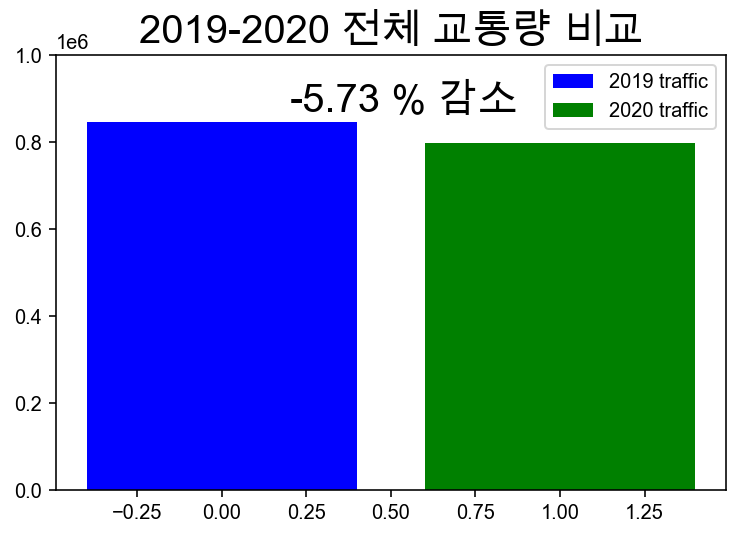

In [33]:
x1 = 0
x2 = 1
y_1 = all_traffic_m_2019["total"].sum() #2019 Total 교통량
y_2 = all_traffic_m_2020["total"].sum() #2020 Total 교통량

plt.bar(x1,y_1, label='2019 traffic', color='b')
plt.bar(x2,y_2, label='2020 traffic', color='g')

plt.legend()
plt.text(0.2,87*10000,all_rate_2019, fontsize=20) #감소량
plt.text(0.5,87*10000,"% 감소",fontsize=20) # 기호 및 설명
plt.ylim([0,1000000])
plt.title("2019-2020 전체 교통량 비교", fontsize=20)

plt.show()

# 2019_2020 월별 교통량 비교

## 월별 대중 교통량 비교

In [34]:
pub_tans_2019 = round(pub_traffic_m_2019["total"].mean())
print("2019년 평균 통행량 :", pub_tans_2019,"대")

2019년 평균 통행량 : 676359867 대


In [35]:
pub_compare_2019 = pub_traffic_m_2019[pub_traffic_m_2019["total"] > pub_traffic_m_2019["total"].mean()]
df_pub_compare_2019 = pd.DataFrame(pub_compare_2019, columns=["total"])
df_pub_compare_2019

,total
월,
2019-03,695974373
2019-04,699471154
2019-05,719349046
2019-07,695624147
2019-10,711970874
2019-11,690195489
2019-12,697837963


In [36]:
pub_tans_2020 = round(pub_traffic_m_2020["total"].mean())
print("2020년 평균 통행량 :", pub_tans_2020,"대")

2020년 평균 통행량 : 500059699 대


In [37]:
pub_compare_2020 = pub_traffic_m_2020[pub_traffic_m_2020["total"] > pub_traffic_m_2020["total"].mean()]
df_pub_compare_2020 = pd.DataFrame(pub_compare_2020, columns=["total"])
df_pub_compare_2020

,total
월,
2020-01,619873025
2020-02,518782694
2020-05,503179606
2020-06,530270196
2020-07,566899895
2020-10,510247343
2020-11,516629667


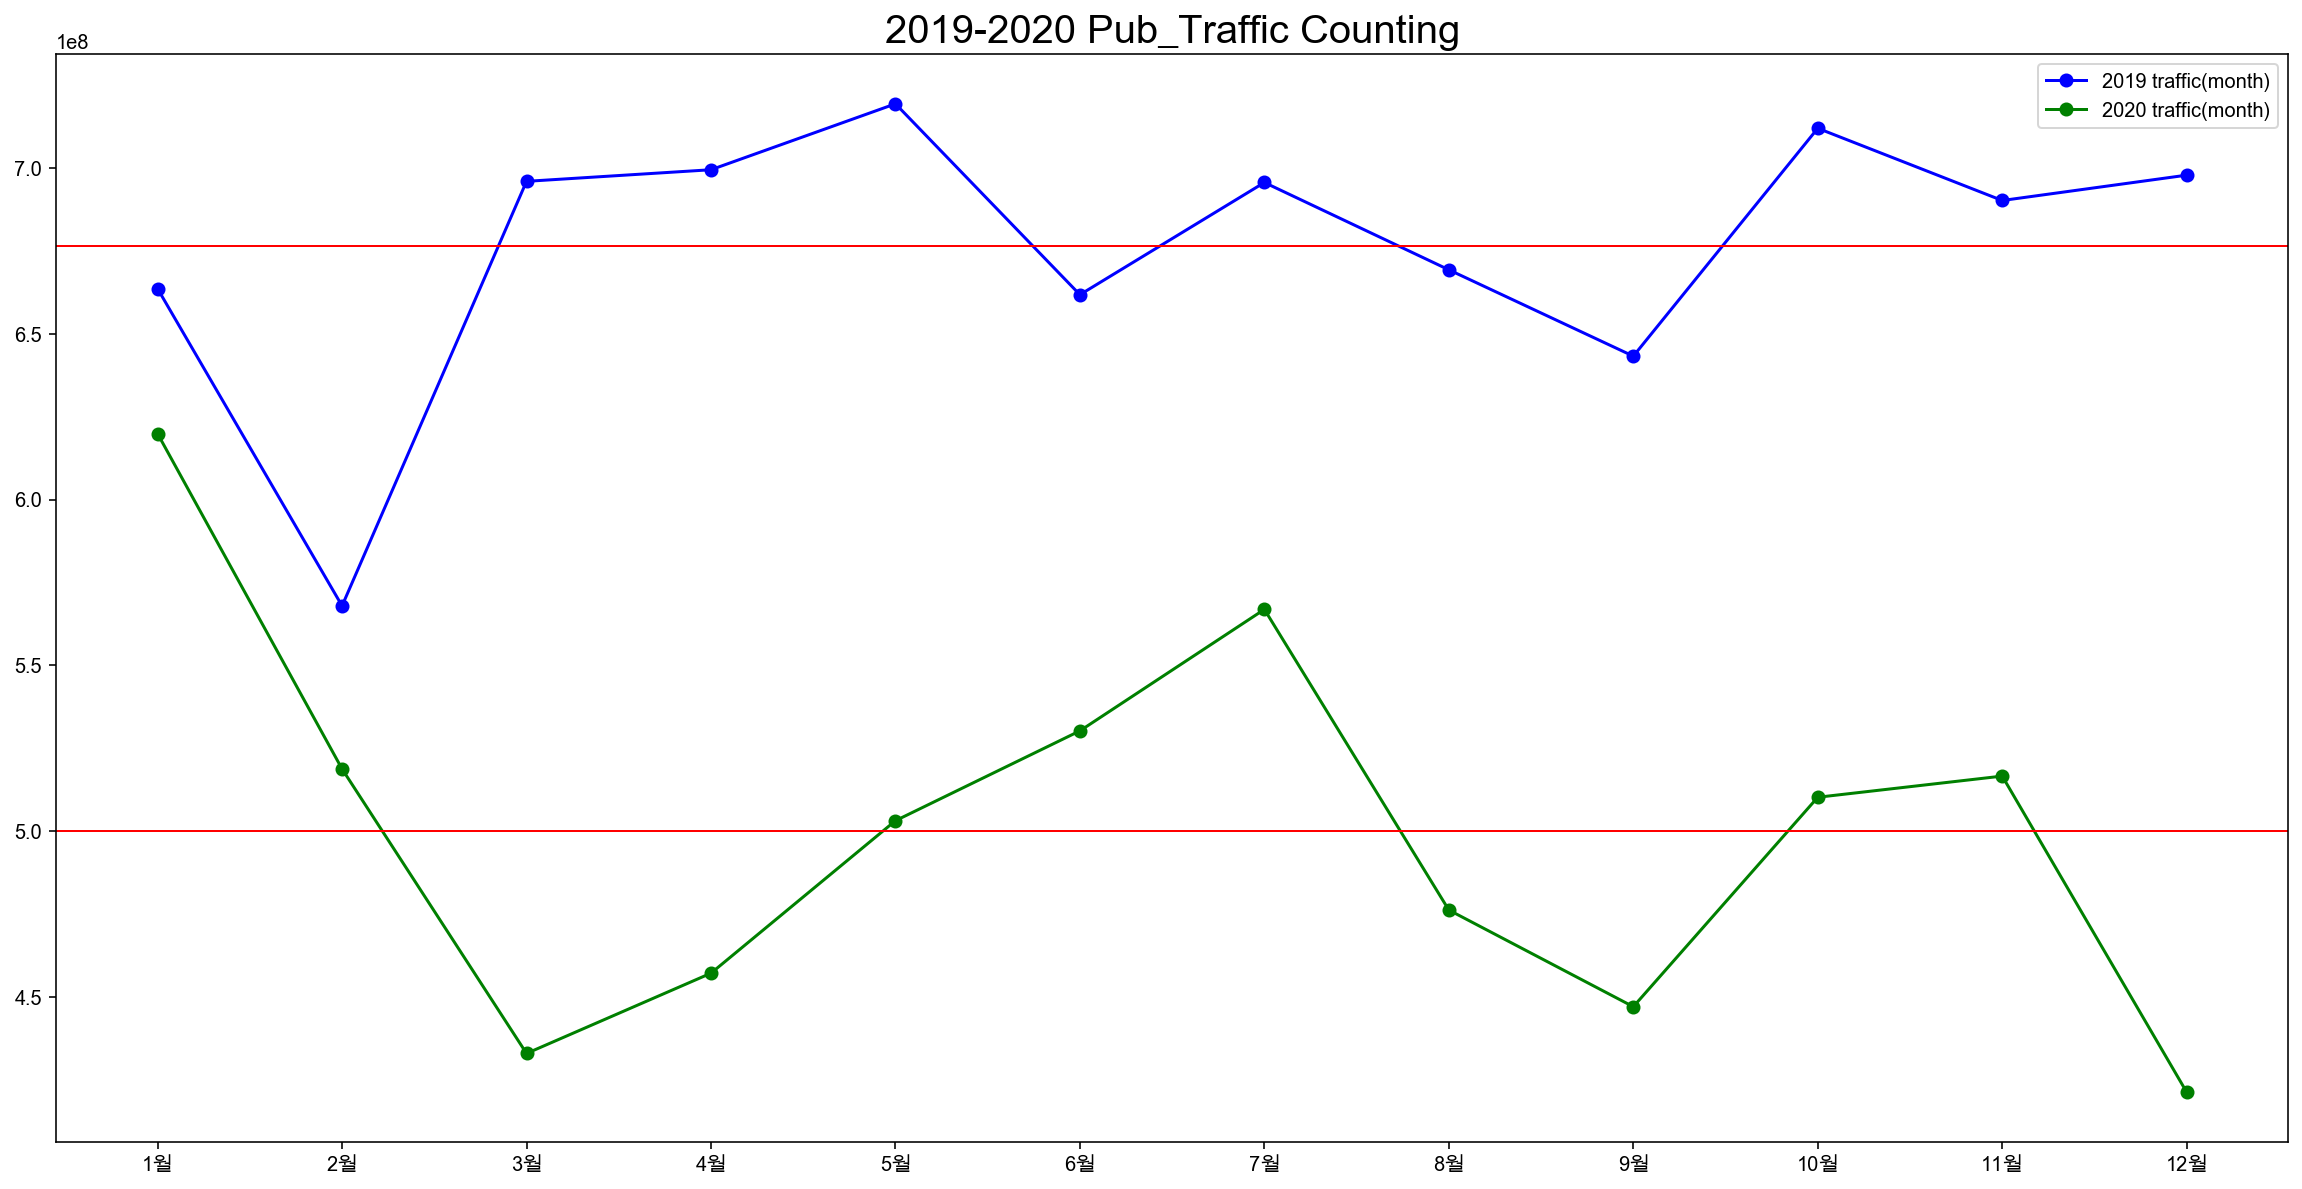

In [40]:
#X1 = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
X = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
y1 = pub_traffic_m_2019.total
y2 = pub_traffic_m_2020.total

plt.figure(figsize=(20, 10))
plt.plot(X,y1, label='2019 traffic(month)', color='b', marker='o')
plt.plot(X,y2, label='2020 traffic(month)', color='g', marker='o')

plt.legend()
plt.title("2019-2020 Pub_Traffic Counting", fontsize=20)
plt.axhline(y=pub_tans_2019, color='r', linewidth=1)
plt.axhline(y=pub_tans_2020, color='r', linewidth=1)

plt.show()

## 월별 차량 통행량 비교

In [41]:
all_tans_2019 = round(all_traffic_m_2019["total"].mean())
print("2019년 평균 통행량 :", all_tans_2019,"대")

2019년 평균 통행량 : 70440 대


In [42]:
all_compare_2019 = all_traffic_m_2019[all_traffic_m_2019["total"] > all_traffic_m_2019["total"].mean()]
df_all_compare_2019 = pd.DataFrame(all_compare_2019, columns=["total"])
df_all_compare_2019

,total
month,
4,72791.226420
5,72098.902509
11,72354.783704
12,71778.392115


In [43]:
all_tans_2020 = round(all_traffic_m_2020["total"].mean())
print("2020년 평균 통행량 :", all_tans_2020,"대")

2020년 평균 통행량 : 66401 대


In [44]:
compare_2020 = all_traffic_m_2020[all_traffic_m_2020["total"] > all_traffic_m_2020["total"].mean()]
compare_df_2020 = pd.DataFrame(compare_2020, columns=["total"])
compare_df_2020

,total
month,
1,68659.238710
2,67650.349170
4,68121.121481
5,69638.799044
6,70124.867654
7,69819.593787


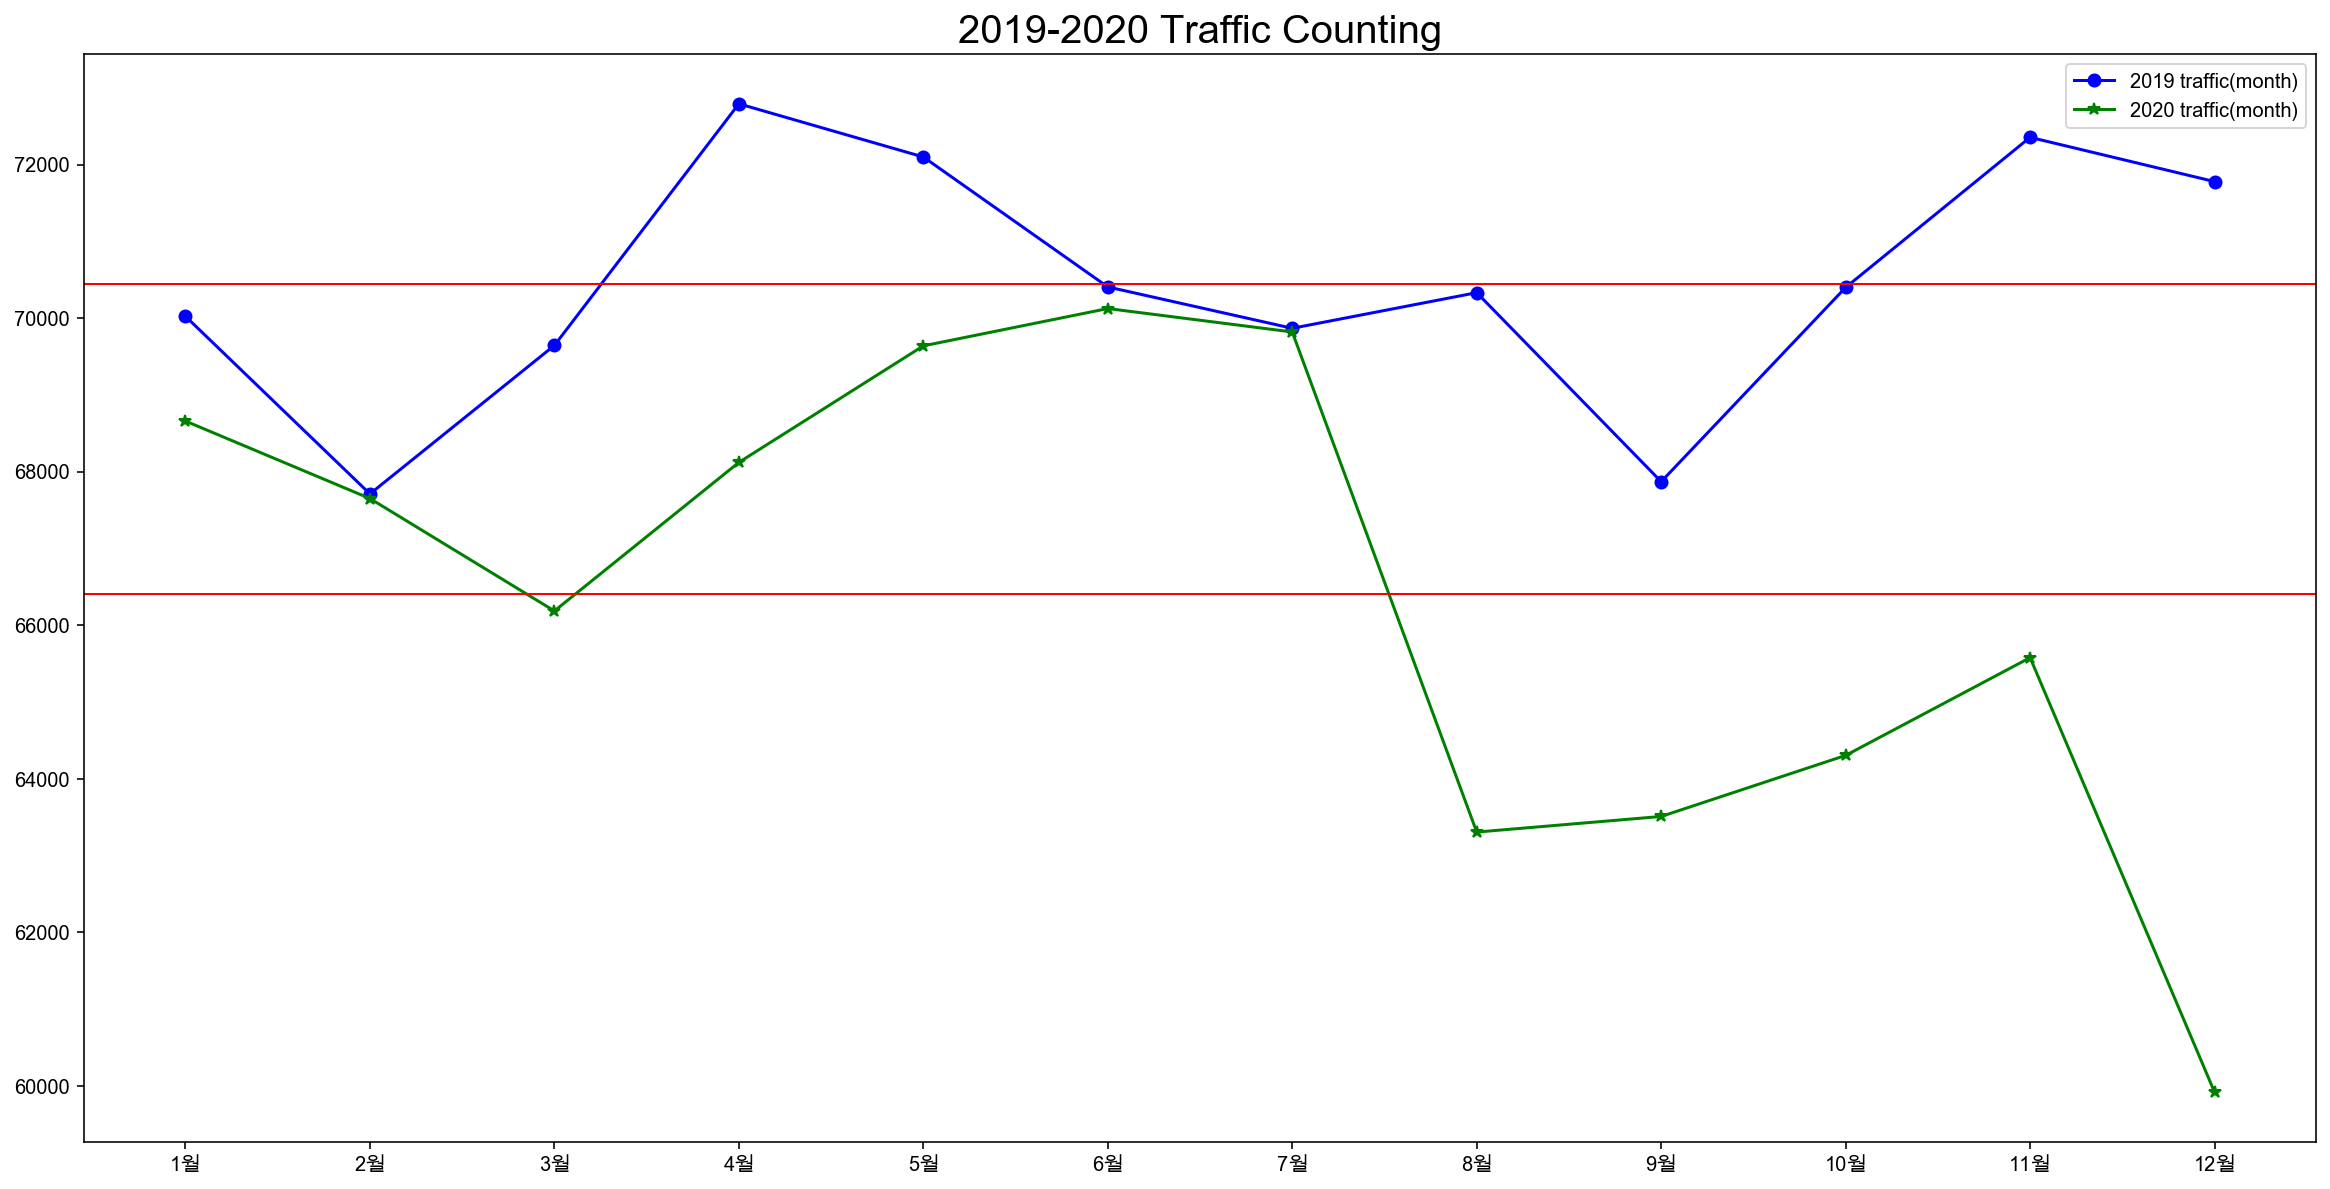

In [46]:
X = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
y1 = all_traffic_m_2019.total
y2 = all_traffic_m_2020.total

plt.figure(figsize=(20, 10))
plt.plot(X,y1, label='2019 traffic(month)', color='b', marker='o')
plt.plot(X,y2, label='2020 traffic(month)', color='g', marker='*')

plt.legend()
plt.title("2019-2020 Traffic Counting", fontsize=20)
plt.axhline(y=all_tans_2019, color='r', linewidth=1)
plt.axhline(y=all_tans_2020, color='r', linewidth=1)

plt.show()

# 2019_2020 요일별 교통량 비교

## 요일별 대중 교통량 비교

In [47]:
df1 = pd.read_csv("2019.csv")
day_pub_traffic_2019 = df1.drop(columns=["시간", "지명", "발생량", "도착량", "월"])
day_pub_traffic_2019

,날짜,count
0,2019-01-01(화),3869
1,2019-01-01(화),3393
2,2019-01-01(화),1571
3,2019-01-01(화),4798
4,2019-01-01(화),3785
...,...,...
218995,2019-12-31(화),11500
218996,2019-12-31(화),17901
218997,2019-12-31(화),26981
218998,2019-12-31(화),29817


In [48]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_pub_traffic_2019[day_pub_traffic_2019["날짜"].str.contains(week)]["count"].sum())

In [49]:
day_pub_traffic_2019 = pd.DataFrame(data=data, index=weeks).reset_index()
day_pub_traffic_2019.columns = ["요일", "total"]
day_pub_traffic_2019

,요일,total
0,월,1248519518
1,화,1295266170
2,수,1271578659
3,목,1261426762
4,금,1317295673
5,토,989868437
6,일,732363190


In [50]:
df2 = pd.read_csv("2020.csv")
day_pub_traffic_2020 = df2.drop(columns=["시간", "지명", "발생량", "도착량", "월"])
day_pub_traffic_2020

,날짜,count
0,2020-01-01(수),2873
1,2020-01-01(수),3251
2,2020-01-01(수),1877
3,2020-01-01(수),3677
4,2020-01-01(수),3077
...,...,...
219595,2020-12-31(목),2483
219596,2020-12-31(목),2779
219597,2020-12-31(목),3203
219598,2020-12-31(목),3305


In [51]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_pub_traffic_2020[day_pub_traffic_2020["날짜"].str.contains(week)]["count"].sum())

In [52]:
day_pub_traffic_2020 = pd.DataFrame(data=data, index=weeks).reset_index()
day_pub_traffic_2020.columns = ["요일", "total"]
day_pub_traffic_2020

,요일,total
0,월,958279301
1,화,978872517
2,수,986414298
3,목,989556461
4,금,974119077
5,토,649499462
6,일,463975271


## 요일별 차량 교통량 비교

In [53]:
ddf3 = pd.read_csv("./data_2019_seoultraffic.csv")
day_all_traffic_2019 = pd.DataFrame(ddf3, columns=["요일", "total"])
day_all_traffic_2019

,요일,total
0,일,42083
1,수,63520
2,목,68255
3,금,69836
4,토,59502
...,...,...
49270,금,114585
49271,토,123559
49272,일,113614
49273,월,110342


In [54]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_all_traffic_2019[day_all_traffic_2019["요일"].str.contains(week)]["total"].sum())

In [55]:
day_all_traffic_2019 = pd.DataFrame(data=data, index=weeks).reset_index()
day_all_traffic_2019.columns = ["요일", "total"]
day_all_traffic_2019

,요일,total
0,월,495321251
1,화,509517933
2,수,527079819
3,목,492164038
4,금,521941567
5,토,492424776
6,일,433350226


In [56]:
ddf4 = pd.read_csv("./data_2020_seoultraffic.csv")
day_all_traffic_2020 = pd.DataFrame(ddf4, columns=["요일", "total"])
day_all_traffic_2020

,요일,total
0,수,43040
1,목,62488
2,금,67088
3,토,54995
4,일,46687
...,...,...
49405,일,95643
49406,월,96370
49407,화,96541
49408,수,97701


In [57]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_all_traffic_2020[day_all_traffic_2020["요일"].str.contains(week)]["total"].sum())

In [58]:
day_all_traffic_2020 = pd.DataFrame(data=data, index=weeks).reset_index()
day_all_traffic_2020.columns = ["요일", "total"]
day_all_traffic_2020

,요일,total
0,월,475181608
1,화,486640237
2,수,493765368
3,목,498696678
4,금,495326562
5,토,454937964
6,일,375774867


# 요일별 대중교통 통행량 비교

## 주말 대중교통 통행량 비교(토,일)

In [59]:
week_pub_traffic = round((np.sum(day_pub_traffic_2020["total"][-2:]) - np.sum(day_pub_traffic_2019["total"][-2:]))\
/ np.sum(day_pub_traffic_2019["total"][-2:]) * 100, 2)

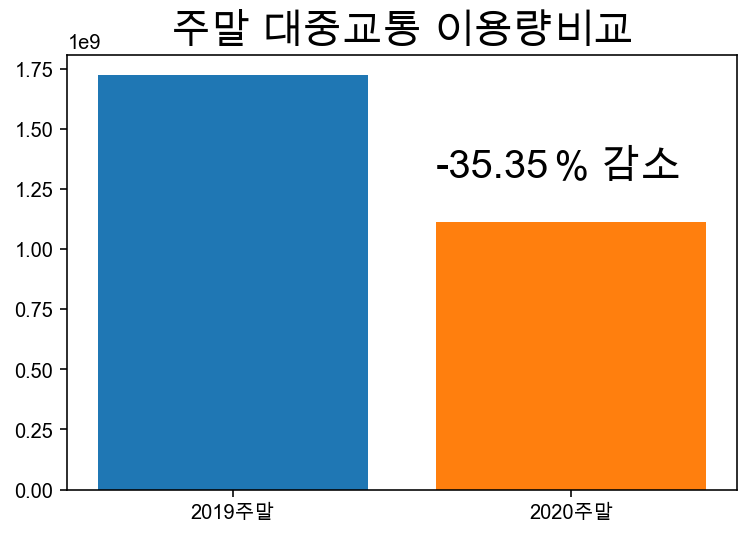

In [60]:
plt.bar("2019주말",np.sum(day_pub_traffic_2019["total"][-2:]))
plt.bar("2020주말",np.sum(day_pub_traffic_2020["total"][-2:]))

a = np.sum(day_pub_traffic_2019["total"][-2:])
b = np.sum(day_pub_traffic_2020["total"][-2:])

plt.text(0.6, 130*10000000,week_pub_traffic, fontsize=20)
plt.text(0.95, 130*10000000,"% 감소",fontsize=20)
plt.title("주말 대중교통 이용량비교", fontsize = 20)

plt.show()

## 주말 챠량 통행량 비교(토,일)

In [61]:
week_all_traffic = round((np.sum(day_all_traffic_2020["total"][-2:]) - np.sum(day_all_traffic_2019["total"][-2:]))\
/ np.sum(day_all_traffic_2019["total"][-2:]) * 100, 2)

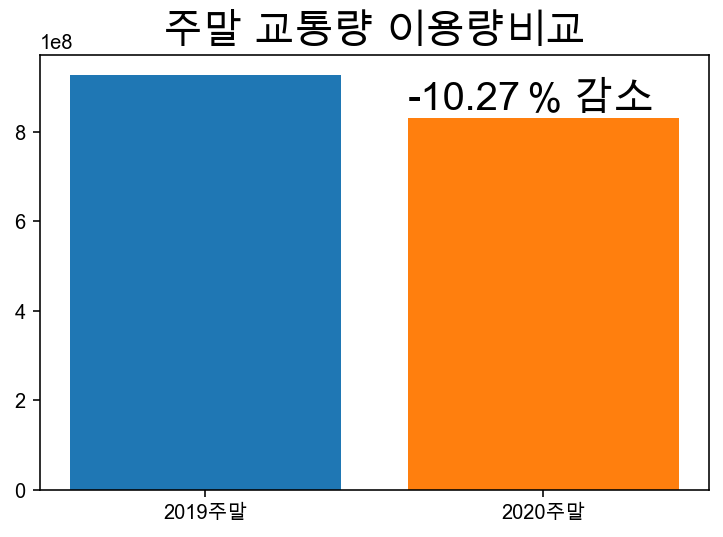

In [62]:
plt.bar("2019주말",np.sum(day_all_traffic_2019["total"][-2:]))
plt.bar("2020주말",np.sum(day_all_traffic_2020["total"][-2:]))

a = np.sum(day_all_traffic_2019["total"][-2:])
b = np.sum(day_all_traffic_2020["total"][-2:])

plt.text(0.6, 85*10000000,week_all_traffic, fontsize=20)
plt.text(0.95, 85*10000000,"% 감소",fontsize=20)
plt.title("주말 교통량 이용량비교", fontsize = 20)

plt.show()

## 평일 대중교통 통행량 비교(월-금)

In [63]:
day_pub_traffic = round((np.sum(day_pub_traffic_2020["total"][:-2]) - np.sum(day_pub_traffic_2019["total"][:-2]))\
/ np.sum(day_pub_traffic_2019["total"][:-2]) * 100, 2)

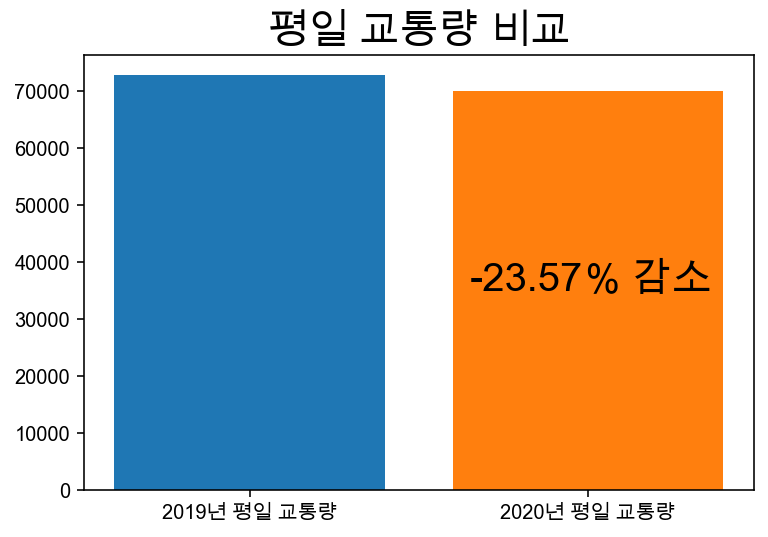

In [65]:
plt.bar("2019년 평일 교통량", y1)
plt.bar("2020년 평일 교통량", y2)

a = np.sum(day_pub_traffic_2019["total"][:-2])
b = np.sum(day_pub_traffic_2020["total"][:-2])

plt.text(0.65, 35*1000,day_pub_traffic, fontsize=20)
plt.text(0.99, 35*1000,"% 감소",fontsize=20)
plt.title("평일 교통량 비교", fontsize = 20)
plt.show()

## 평일 차량 통행량 비교(월-금)

In [66]:
day_all_traffic = round((np.sum(day_all_traffic_2020["total"][:-2]) - np.sum(day_all_traffic_2019["total"][:-2]))\
/ np.sum(day_all_traffic_2019["total"][:-2]) * 100, 2)

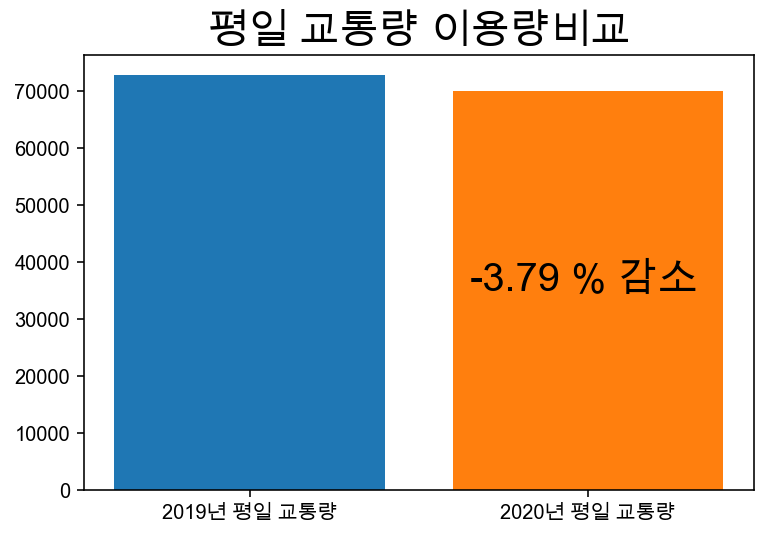

In [67]:
plt.bar("2019년 평일 교통량", y1)
plt.bar("2020년 평일 교통량", y2)

a = np.sum(day_all_traffic_2019["total"][:-2])
b = np.sum(day_all_traffic_2020["total"][:-2])

plt.text(0.65, 35*1000,day_all_traffic, fontsize=20)
plt.text(0.95, 35*1000,"% 감소",fontsize=20)
plt.title("평일 교통량 이용량비교", fontsize = 20)
plt.show()

# 지역별 비교

## 지역별 대중교통량 비교

In [68]:
pub_traffic_r_2019.loc[:,'region'] = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', \
                                  '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', \
                                 '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]

pub_traffic_r_2019.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,total,region
지명,,,,,,,,,,,,,,,,,,,,,
중구,3518016,572340,239087,215153,501450,3155734,5716093,12502745,25150575,18739397,...,29865336,37557276,55470515,38990793,27587356,25132393,21287791,12756123,447485581,중구
중랑구,1429246,237634,75320,66496,865449,3163495,6457136,15182553,22283249,13902473,...,11444769,12500258,14244402,12439521,8442147,7587105,6741702,3980054,199074236,중랑구


In [69]:
pub_traffic_r_2019['total'].mean()

324652736.36

In [70]:
pub_traffic_r_2019_a = round(pub_traffic_r_2019['total'].mean())
print("2019년 평균 통행량 :", pub_traffic_r_2019_a,"대")

2019년 평균 통행량 : 324652736 대


In [71]:
r_p_compare_2019 = pub_traffic_r_2019[pub_traffic_r_2019["total"] > pub_traffic_r_2019["total"].mean()]
df_r_p_compare_2019 = pd.DataFrame(r_p_compare_2019, columns=["total"])
df_r_p_compare_2019

,total
지명,
강남구,737727211
강서구,345163358
관악구,379996454
구로구,377044464
마포구,408143716
서초구,508376369
송파구,475428128
영등포구,411573195
종로구,410146010


In [72]:
pub_traffic_r_2020.loc[:,'region'] = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', \
                                   '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', \
                                 '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]

pub_traffic_r_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,total,region
지명,,,,,,,,,,,,,,,,,,,,,
중구,1030686,267406,125901,144638,524518,2845992,6134273,15971819,33999864,20472449,...,17012446,23538009,33093127,18656846,13260295,11477169,8628758,4649330,295154710,중구
중랑구,999460,179205,71499,63145,722886,2550547,4890796,10808463,14961209,8788647,...,8997200,10484633,13326202,11698006,7464722,6621289,5495151,3253670,153829883,중랑구


In [73]:
pub_traffic_r_2020_a = round(pub_traffic_r_2020['total'].mean())
print("2020년 평균 통행량 :", pub_traffic_r_2020_a,"대")

2020년 평균 통행량 : 240028655 대


In [74]:
r_p_compare_2020 = pub_traffic_r_2020[pub_traffic_r_2020["total"] > pub_traffic_r_2020["total"].mean()]
df_r_p_compare_2020 = pd.DataFrame(r_p_compare_2020, columns=["total"])
df_r_p_compare_2020

,total
지명,
강남구,567110115
강서구,260342153
관악구,289329188
구로구,283206229
마포구,290281580
서초구,368079647
송파구,351362444
영등포구,311535742
종로구,280859306


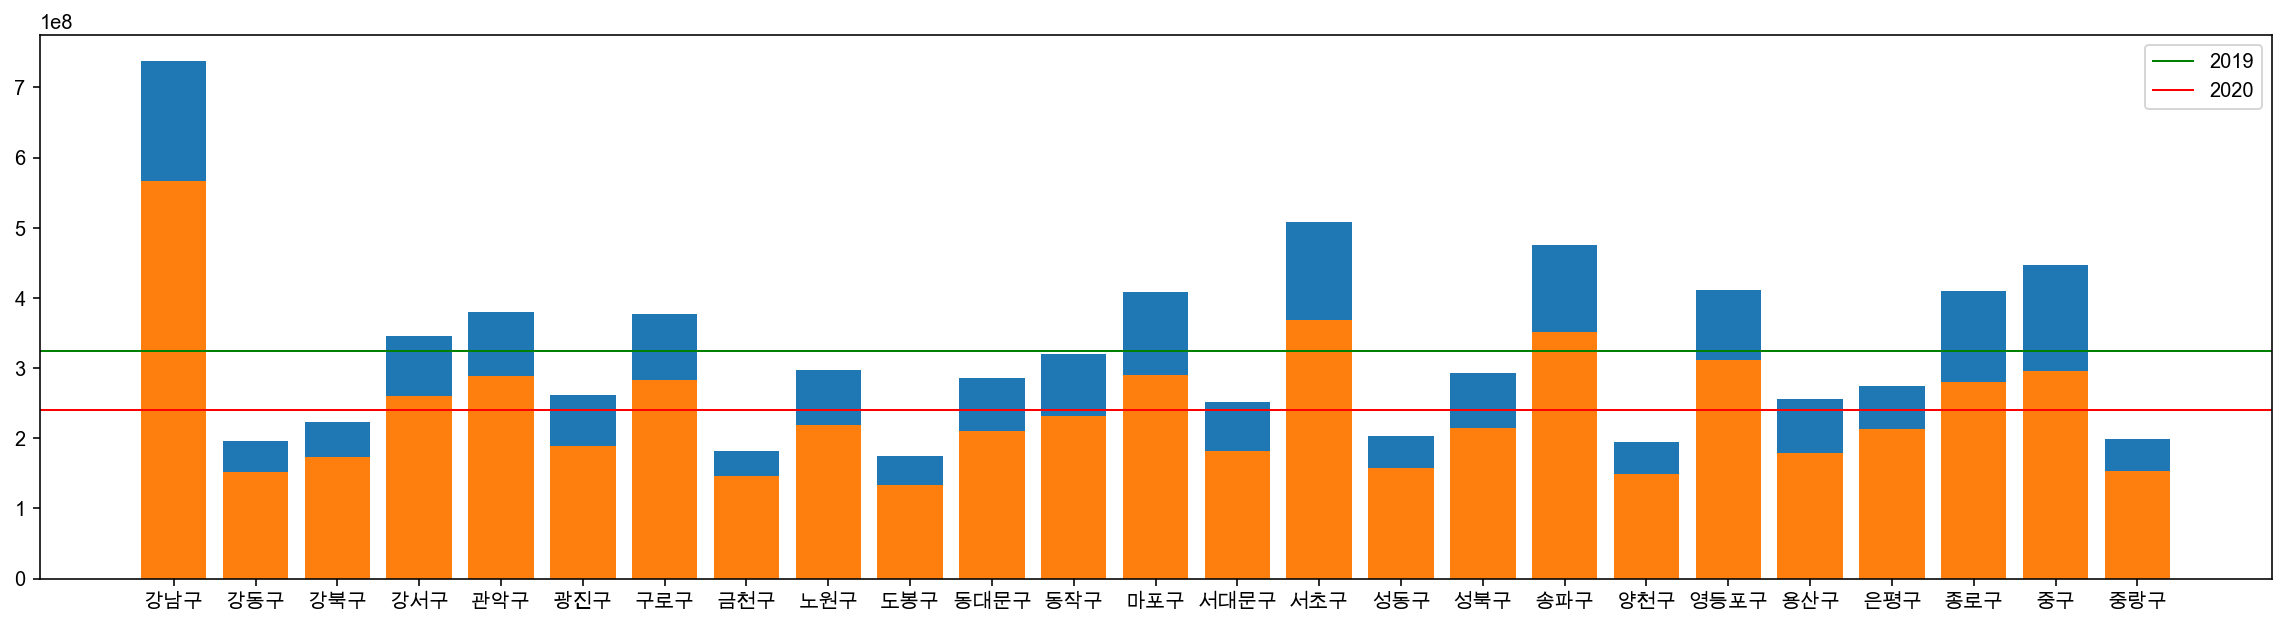

In [75]:
plt.figure(figsize=(20, 5))

X = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', \
    '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', \
    '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]

plt.bar(X, pub_traffic_r_2019["total"])
plt.bar(X, pub_traffic_r_2020["total"])

plt.axhline(y=pub_traffic_r_2019['total'].mean(), color='g', linewidth=1, label="2019")
plt.axhline(y=pub_traffic_r_2020['total'].mean(), color='r', linewidth=1, label="2020")
plt.legend()

plt.show()

## 지역별 차량 교통량 비교

In [76]:
all_traffic_r_2019.loc[:, '구'] = ["강남구", "강동구", "강서구", "과천시", "관악구", "광명시", "광진구", "구로구", "구리시", "금천구",\
"김포시", "노원구", "도봉구", "동작구", "마포구", "부천시", "서초구", "성동구", "성북구", "송파구", "양천구", "용산구",\
"은평구", "종로구", "중랑구", "하남시", "고양시", "금천구", "동대문구", "서대문구", "영등포구", " 중구"]

all_traffic_r_2019.tail(2)

,total,구
구,,
영등포구,70866.447123,영등포구
중구,37562.815068,중구


In [79]:
all_traffic_r_2019_a = round(all_traffic_r_2019['total'].mean())
print("2019년 평균 통행량 :", all_traffic_r_2019_a,"대")

2019년 평균 통행량 : 73021 대


In [80]:
r_a_compare_2019 = all_traffic_r_2019[all_traffic_r_2019["total"] > all_traffic_r_2019["total"].mean()]
df_a_p_compare_2019 = pd.DataFrame(r_p_compare_2019, columns=["total"])
df_a_p_compare_2019

,total
지명,
강남구,737727211
강서구,345163358
관악구,379996454
구로구,377044464
마포구,408143716
서초구,508376369
송파구,475428128
영등포구,411573195
종로구,410146010


In [81]:
all_traffic_r_2020_a = round(all_traffic_r_2020['total'].mean())
print("2020년 평균 통행량 :", all_traffic_r_2020_a,"대")

2020년 평균 통행량 : 70227 대


In [82]:
r_a_compare_2020 = all_traffic_r_2020[all_traffic_r_2020["total"] > all_traffic_r_2020["total"].mean()]
df_a_p_compare_2020 = pd.DataFrame(r_p_compare_2020, columns=["total"])
df_a_p_compare_2020

,total
지명,
강남구,567110115
강서구,260342153
관악구,289329188
구로구,283206229
마포구,290281580
서초구,368079647
송파구,351362444
영등포구,311535742
종로구,280859306


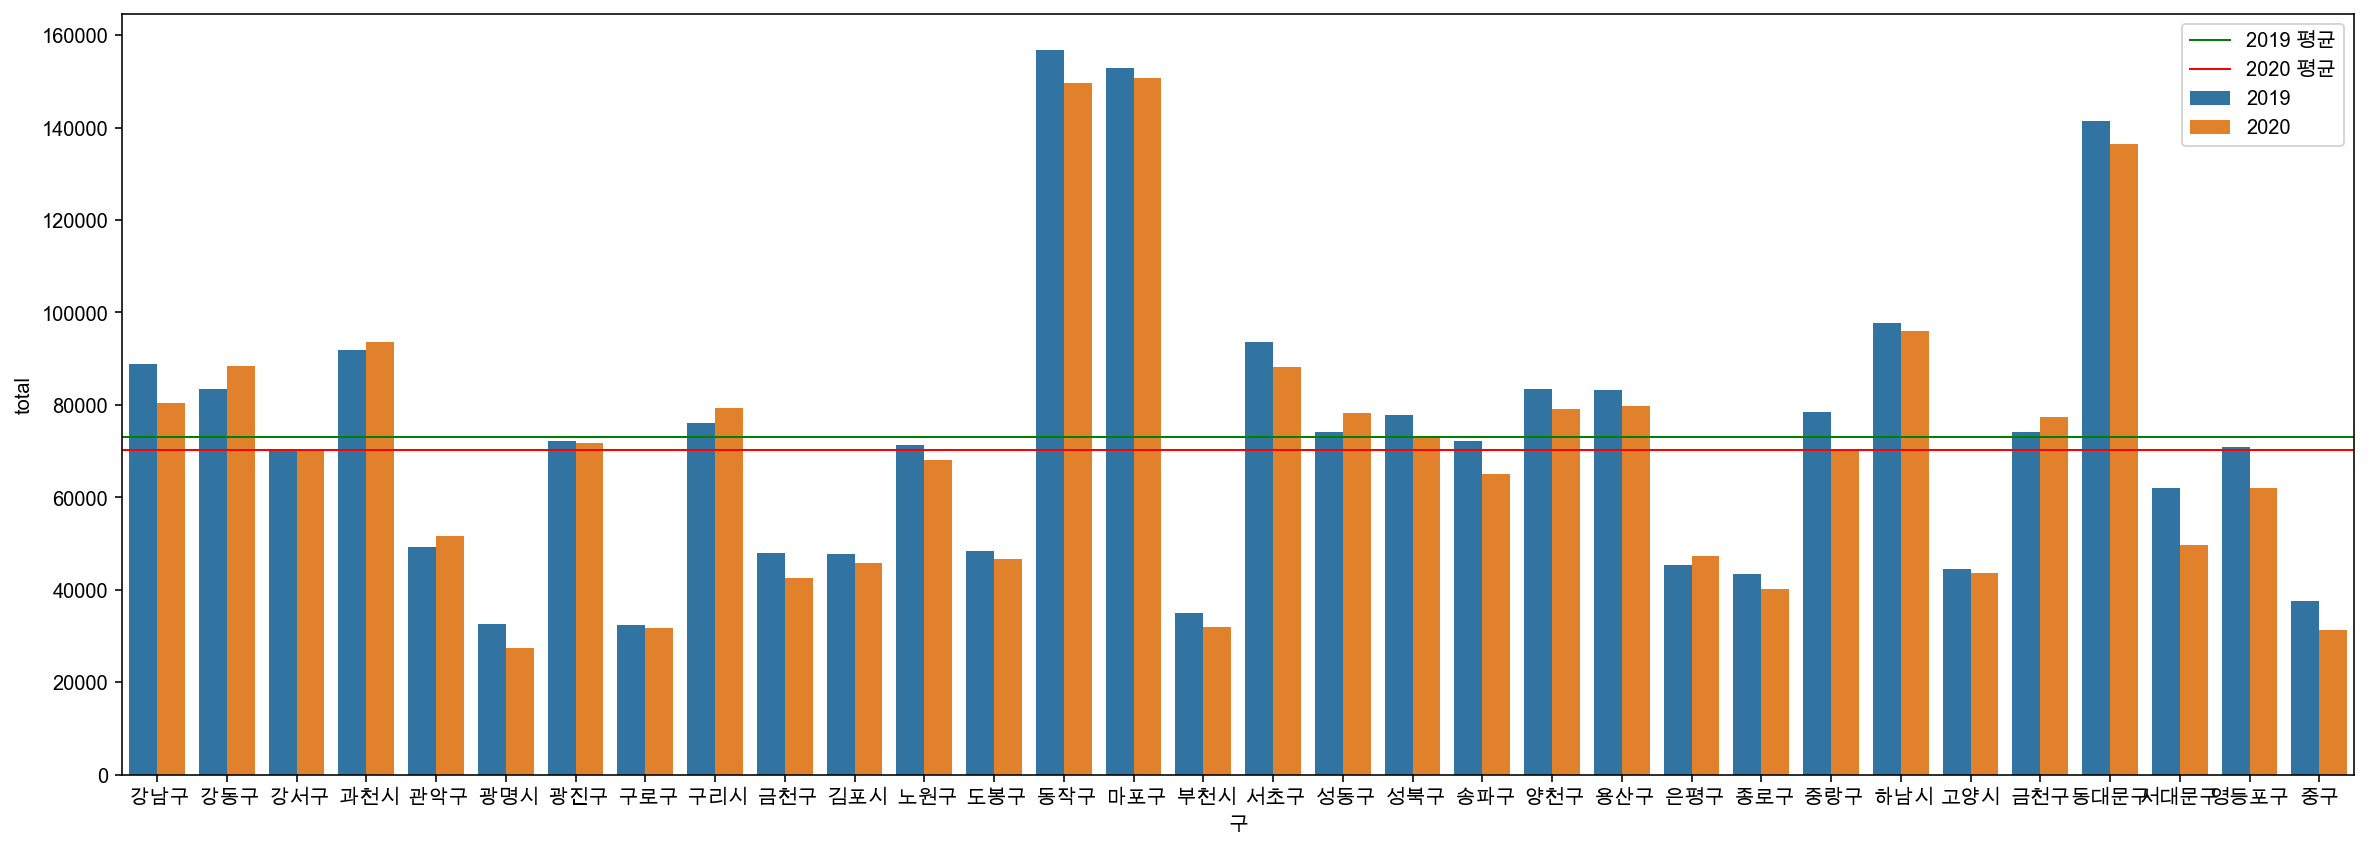

In [131]:
traffic_2019 = all_traffic_r_2019["total"].reset_index()
traffic_2020 = all_traffic_r_2020["total"].reset_index()
traffic_2019["year"] = 2019
traffic_2020["year"] = 2020
merge_traffic = pd.concat([traffic_2019,traffic_2020],0)

plt.figure(figsize = (20,7))
sns.barplot('구', "total", data = merge_traffic, hue = "year")

plt.axhline(y=all_traffic_r_2019['total'].mean(), color='g', linewidth=1, label="2019 평균")
plt.axhline(y=all_traffic_r_2020['total'].mean(), color='r', linewidth=1, label="2020 평균")
plt.legend()

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.show()

# 코로나 확진자 수에 따른 비교

## 코로나 확진자 수에 따른 교통량 비교

In [255]:
corona = pd.read_csv('/Users/ijiyeong/Downloads/서울시 코로나19 확진자 현황 (2).csv', encoding='utf-8')
corona["count"] = 1 #날짜별 count를 위해 새롭게 생성한 column에 각 1이란 값을 입력
corona_df = pd.DataFrame(corona, columns=["지역","날짜","count"])
corona_df.rename(columns = {"지역" : "지명"}, inplace=True)
corona_df.tail(2)

,지명,날짜,count
19390,중랑구,2020.1.30,1
19391,강서구,2020.1.24,1


In [256]:
corona_df.info() #data type 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19392 entries, 0 to 19391
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지명      19392 non-null  object
 1   날짜      19392 non-null  object
 2   count   19392 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 454.6+ KB


In [257]:
corona_df["날짜"] # 문자열 데이터

0        2020.12.22
1        2020.12.21
2        2020.12.27
3        2020.12.10
4        2020.12.10
            ...    
19387     2020.1.31
19388     2020.1.30
19389     2020.1.30
19390     2020.1.30
19391     2020.1.24
Name: 날짜, Length: 19392, dtype: object

In [258]:
pd.to_datetime(corona_df["날짜"]) # 날짜열 데이터로 변환

0       2020-12-22
1       2020-12-21
2       2020-12-27
3       2020-12-10
4       2020-12-10
           ...    
19387   2020-01-31
19388   2020-01-30
19389   2020-01-30
19390   2020-01-30
19391   2020-01-24
Name: 날짜, Length: 19392, dtype: datetime64[ns]

In [259]:
corona_df["날짜_datetime"] = pd.to_datetime(corona_df["날짜"]) # 날짜를 추출하기 위해 새로운 column 추가
corona_df.tail(1)

,지명,날짜,count,날짜_datetime
19391,강서구,2020.1.24,1,2020-01-24


In [260]:
corona_df["year"] = corona_df["날짜_datetime"].dt.year
corona_df["month"] = corona_df["날짜_datetime"].dt.month
corona_df["day"] = corona_df["날짜_datetime"].dt.day
corona_df.tail()  # year, month, day로 구분해서 columns 생성

,지명,날짜,count,날짜_datetime,year,month,day
19387,성북구,2020.1.31,1,2020-01-31,2020,1,31
19388,마포구,2020.1.30,1,2020-01-30,2020,1,30
19389,종로구,2020.1.30,1,2020-01-30,2020,1,30
19390,중랑구,2020.1.30,1,2020-01-30,2020,1,30
19391,강서구,2020.1.24,1,2020-01-24,2020,1,24


In [261]:
corona_df.groupby(['month'])["count"].agg('sum') # 월별 발생량 합계

month
1         7
2        80
3       391
4       156
5       229
6       459
7       281
8      2415
9      1306
10      733
11     2904
12    10431
Name: count, dtype: int64

Text(0.5, 1.0, '월별 확진자 현황과 교통량 비교')

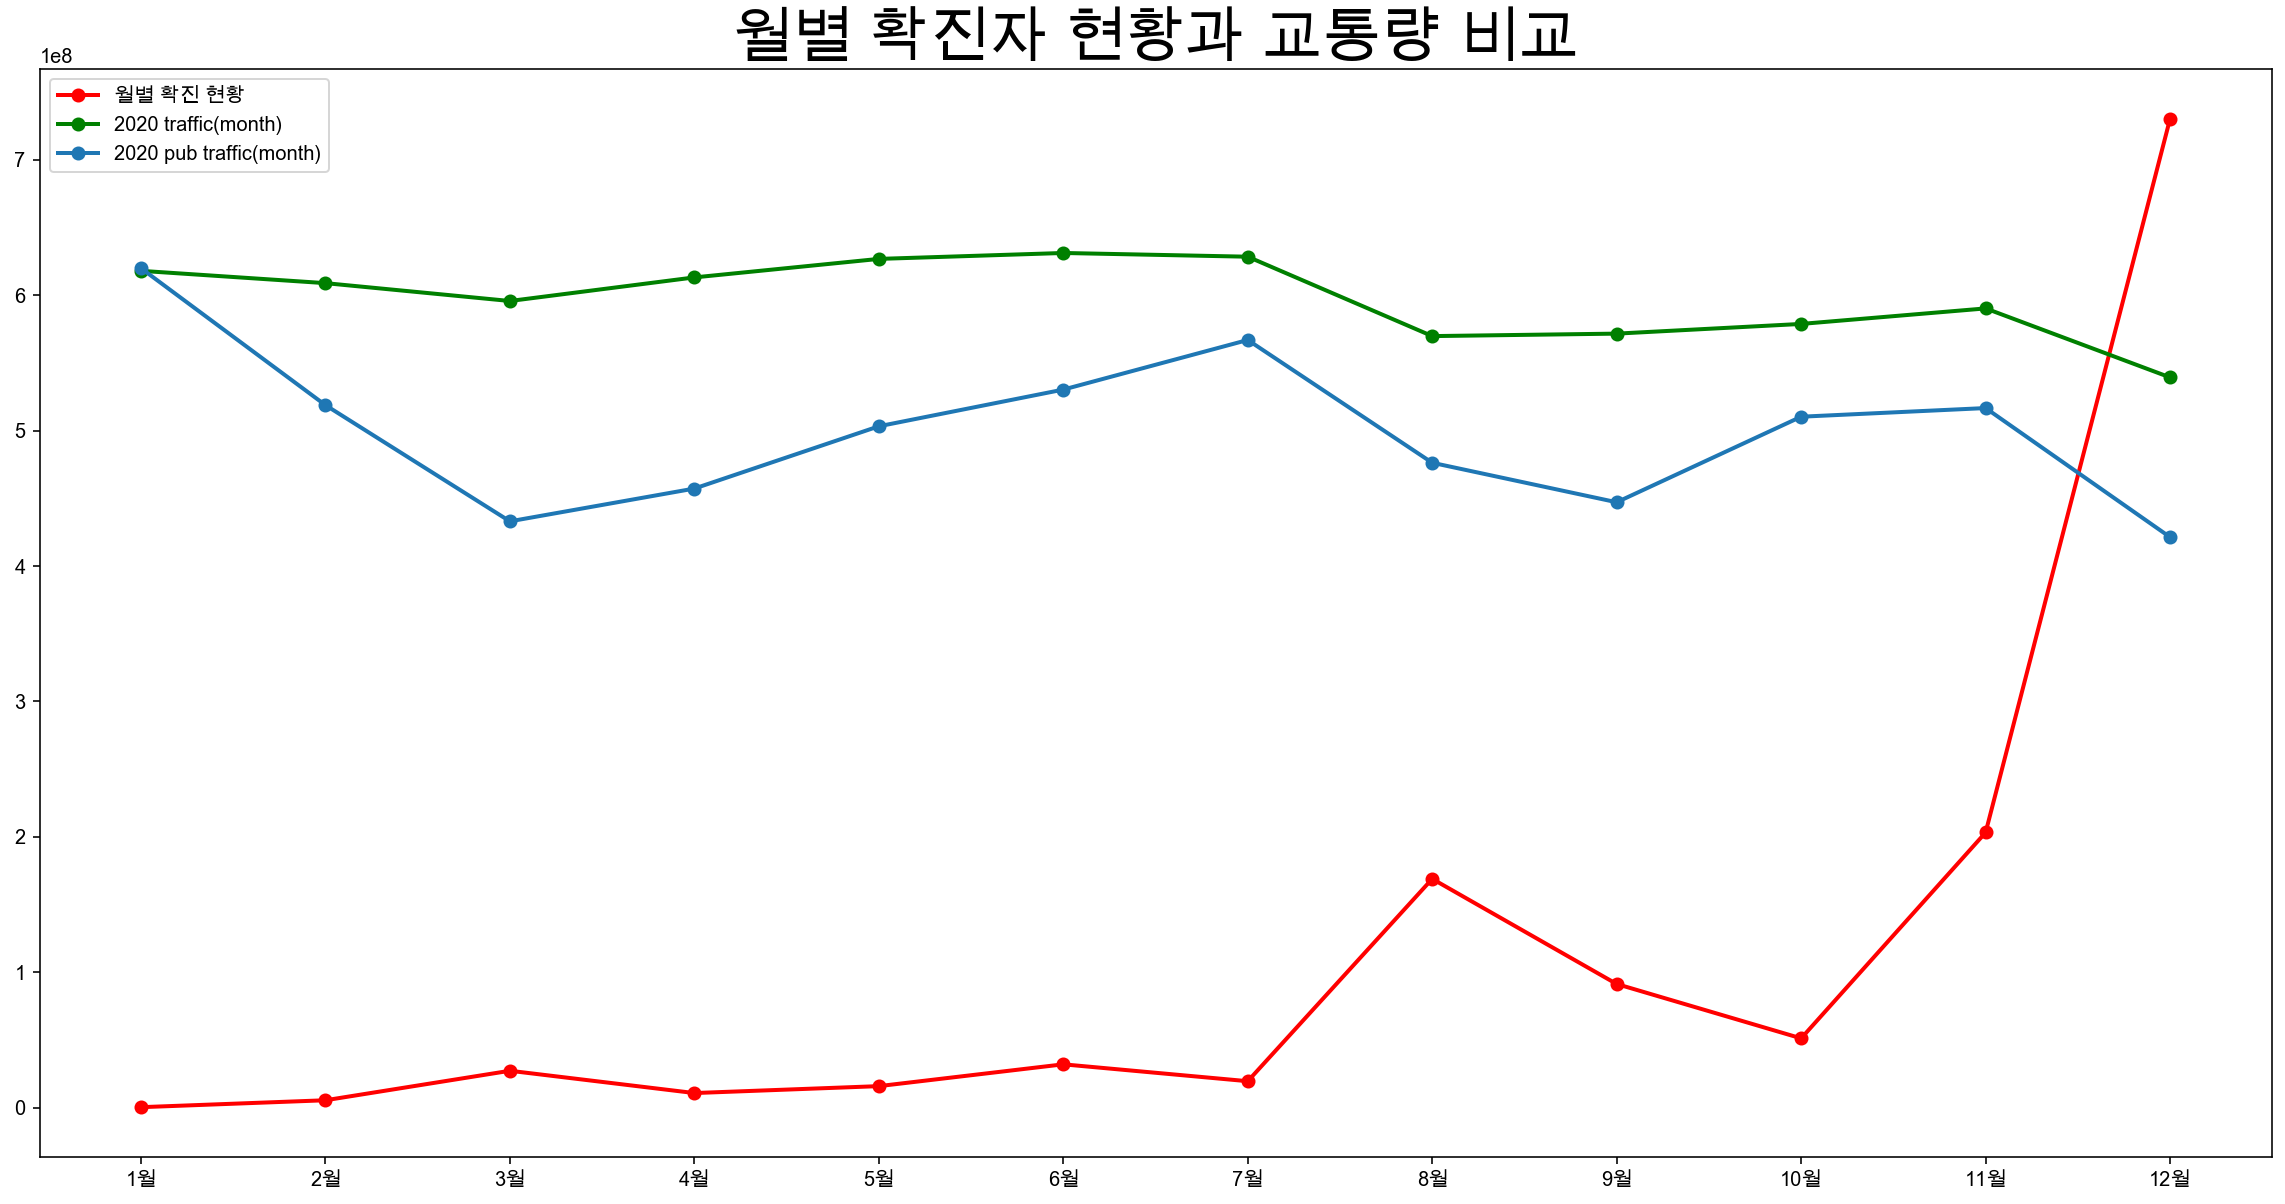

In [262]:
X = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
y = corona_df.groupby(['month'])["count"].agg('sum') * 70000 # 데이터 경향을 자세히 보기 위해 월별 합계를 일괄적으로 x7000 증가
#y1 = all_traffic_m_2019.total * 9000
y2 = all_traffic_m_2020.total * 9000
#y3 = pub_traffic_m_2019.total
y4 = pub_traffic_m_2020.total

plt.figure(figsize=(20, 10))
plt.plot(X,y, label='월별 확진 현황', color='r', marker='o',linewidth=2)
#plt.plot(X,y1, label='2019 traffic(month)', color='b', marker='o',linewidth=2)
plt.plot(X,y2, label='2020 traffic(month)', color='g', marker='o',linewidth=2)
#plt.plot(X,y3, label='2019 pub traffic(month)', marker='o',linewidth=2)
plt.plot(X,y4, label='2020 pub traffic(month)', marker='o',linewidth=2)
#plt.ylim(0,1000000)

plt.legend()
plt.title("월별 확진자 현황과 교통량 비교", fontsize=30)


## 코로나 확진자 수에 따른 지역별 상관관계 비교

In [264]:
(corona_df.drop_duplicates(['지명'], keep="last"))['지명']# 중복된 지역 제거

19256      중구
19288     강북구
19289     용산구
19294     도봉구
19309    영등포구
19310      기타
19324     광진구
19330    동대문구
19332     양천구
19338     강남구
19344     동작구
19346     노원구
19353     금천구
19355     관악구
19357     은평구
19367     강동구
19368     구로구
19369     서초구
19377     성동구
19381    서대문구
19383     송파구
19384     타시도
19387     성북구
19388     마포구
19389     종로구
19390     중랑구
19391     강서구
Name: 지명, dtype: object

In [265]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19392 entries, 0 to 19391
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   지명           19392 non-null  object        
 1   날짜           19392 non-null  object        
 2   count        19392 non-null  int64         
 3   날짜_datetime  19392 non-null  datetime64[ns]
 4   year         19392 non-null  int64         
 5   month        19392 non-null  int64         
 6   day          19392 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.0+ MB


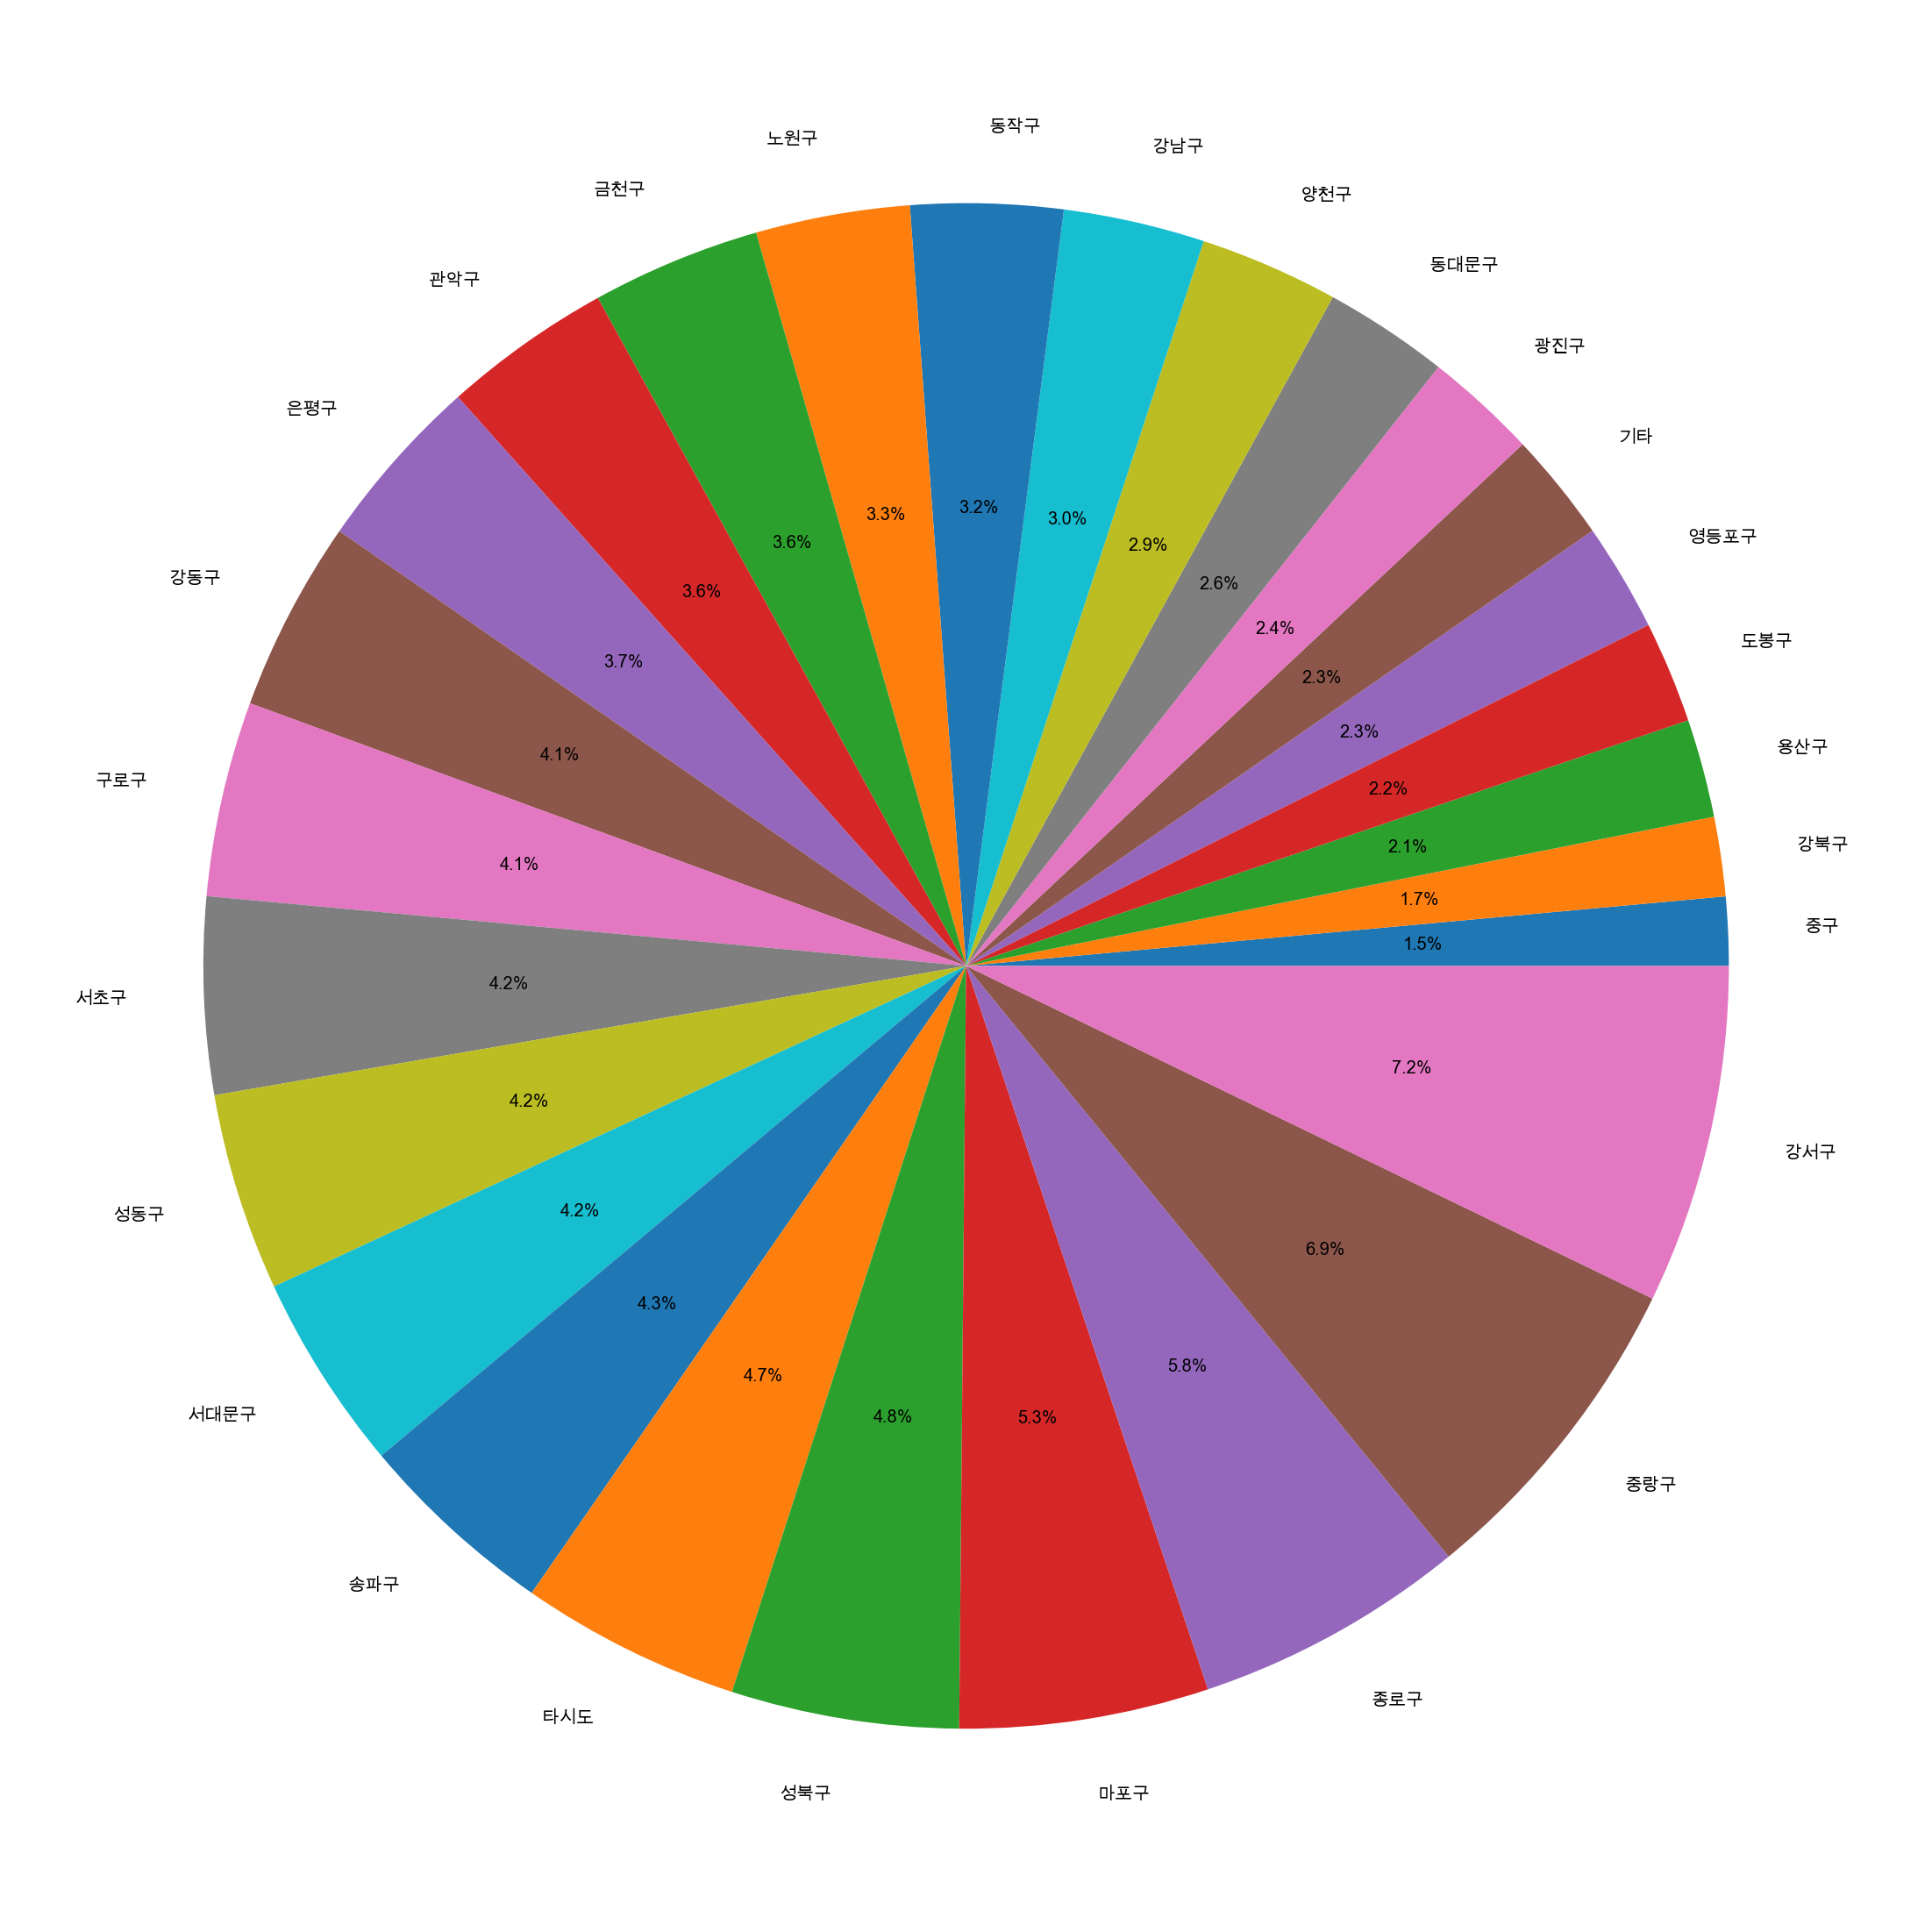

In [379]:
ratio = (corona_df.groupby(['지명'])["count"].agg('sum')).sort_values()
labels = ["중구" ,"강북구", "용산구", "도봉구", "영등포구", "기타", "광진구", "동대문구", "양천구", "강남구", "동작구", "노원구",\
     "금천구", "관악구", "은평구", "강동구", "구로구", "서초구", "성동구", "서대문구", "송파구", "타시도", "성북구", "마포구",\
     "종로구", "중랑구", "강서구"]

plt.figure(figsize=(20, 20))
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

<BarContainer object of 27 artists>

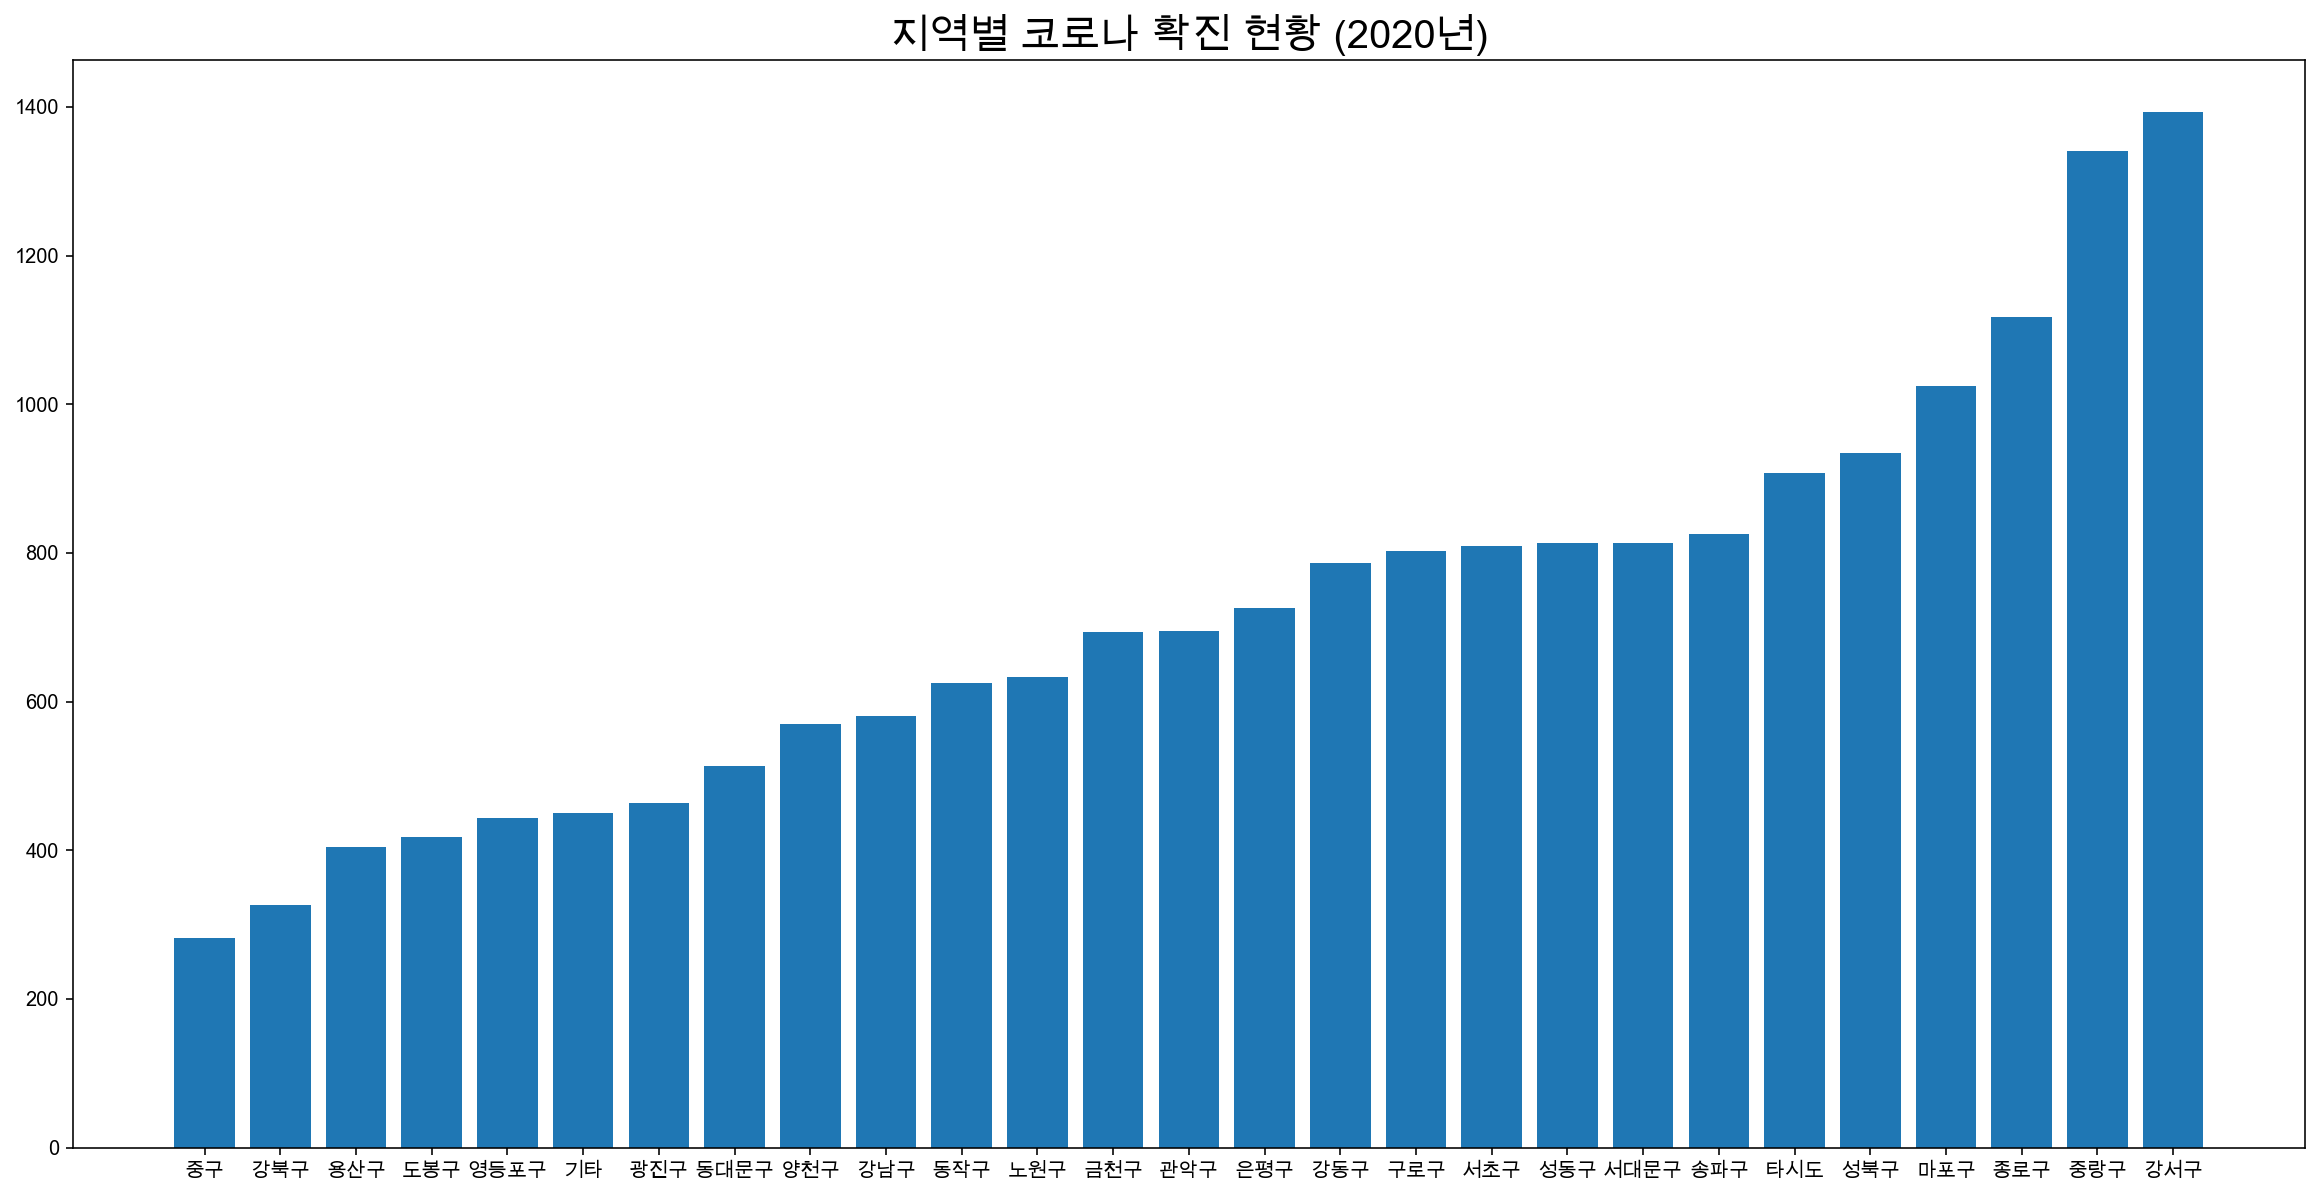

In [267]:
X = ["중구" ,"강북구", "용산구", "도봉구", "영등포구", "기타", "광진구", "동대문구", "양천구", "강남구", "동작구", "노원구",\
     "금천구", "관악구", "은평구", "강동구", "구로구", "서초구", "성동구", "서대문구", "송파구", "타시도", "성북구", "마포구",\
     "종로구", "중랑구", "강서구"]
y = (corona_df.groupby(['지명'])["count"].agg('sum')).sort_values()

plt.figure(figsize=(20, 10))
plt.title("지역별 코로나 확진 현황 (2020년)", fontsize=20)
plt.bar(X,y)

In [395]:
df111["Nan"] = 0
#df111["Nan1"] = 0
#df112["Nan"] = 0
#df112["Nan1"] = 0

In [396]:
df111 = df1.pivot_table("count", "month","지명", aggfunc=np.sum)
df111

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
month,,,,,,,,,,,,,,,,,,,,,
1,62564514,16003320,18272033,28571152,31530075,21283538,31237475,15237962,23670015,14363205,...,16363789,22816245,38721634,16163986,33755696,20220049,22066690,33724096,36108251,16168023
2,51717525,13702356,15988586,24674059,26885423,18551283,26546552,12918100,20628840,12451698,...,13913199,19729727,33276461,13867180,28668912,17676466,19216027,28691290,30900667,14105826
3,61636071,16687008,19323117,29758597,32935186,22687189,32342549,15425388,26065911,15080022,...,17472543,25885604,40167848,16659670,34543017,21713061,23521658,35209059,38225230,17267228
4,62102314,16803958,19239144,29929217,32607242,22751370,32588814,15625664,25990494,15093713,...,17644337,25739203,41310682,16719428,36444865,21633727,23661985,35157407,38766546,17244306
5,63494137,17229846,20000232,30594873,33507284,23791260,33300366,15921071,27058204,15610152,...,18182868,26863047,42184263,17146058,36224954,22632103,24389270,36587507,39624401,17869112
6,59155056,15986594,18430795,28400559,31029167,21528915,30882407,14734456,24400584,14414397,...,16651401,24007119,38749939,15903336,33277349,21101987,22616683,33115849,36545121,16389806
7,65845064,16984354,19081601,30073575,32659726,22064591,32421542,15939414,25095361,14969280,...,17444788,24176440,41025186,17024397,35579331,21601076,23667569,34388392,37833837,16989627
8,61999256,16227363,18518188,28953838,31525664,21455047,31101097,15089007,24089285,14411623,...,16621445,23205977,39451019,16354696,34168457,21168442,22960886,33344560,36726273,16419665
9,56888169,15465863,17909013,27337084,30256896,20750881,29979795,14483106,23826853,13976855,...,16318101,23980675,37084487,15423285,32661792,20488810,22058803,32117545,35113382,15885187


In [389]:
df112 = df2.pivot_table("count", "지명","month", aggfunc=np.sum)
df112.T

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
month,,,,,,,,,,,,,,,,,,,,,
1,58707585,15287160,17133114,26211559,29053048,19709457,28871670,14182668,22206374,13330496,...,15576416,21429801,36727831,15047432,31693696,19559027,21074957,30797270,33642739,15033820
2,50191932,13079588,14718649,22352578,25108171,16369685,24210730,12280460,18741713,11376476,...,13425419,17941798,30200827,12989108,26756571,15855208,17884570,24257969,26405590,13006622
3,40640785,11087778,12933424,18969874,21335985,14085129,20132384,10703491,15666470,9958447,...,11672512,15560159,25339569,10730384,22746549,12686543,15333275,19683709,20869804,11395272
4,42792230,11686769,13566575,19782432,22298732,14787520,21391608,11166920,16550376,10356094,...,12241710,16339509,26596328,11273581,23890110,13393101,16346318,21412905,22043937,11837350
5,46746324,12950173,14851056,21728823,24357105,16213608,23557840,12058070,18537170,11374166,...,13249951,18201365,29518536,12506740,26217061,14529323,18037324,23925665,24299217,12993696
6,50665518,13716112,15230229,22794398,25361391,16619572,24716704,12829409,19583551,11785503,...,13942551,19318219,30925569,13130214,27690072,15574266,18942863,24888534,25845519,13509808
7,55008674,14566783,16010642,24302741,26780613,17711015,26367084,13565980,20650621,12449276,...,14932615,20190524,33218506,14148052,29496719,16972442,20064713,27066742,27757168,14204326
8,45542116,11901122,13638792,21084913,23431481,14870639,22703590,11624161,17303915,10590026,...,12601977,16555772,27973646,12146524,24828995,14331547,17015307,21554910,22345598,12309367
9,41088790,11073155,13211855,19703575,21959894,13929383,21725096,11389446,16239778,10178852,...,12062843,16175137,25853041,11260183,23300896,13220963,16359678,20177326,21395465,11866483


In [390]:
df113 = corona_df.pivot_table("count", "지명","month", aggfunc=np.sum)
df113.T

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN
2,7.0,4.0,NaN,1.0,4.0,1.0,1.0,1.0,1.0,8.0,...,1.0,12.0,1.0,1.0,NaN,7.0,8.0,NaN,NaN,9.0
3,34.0,6.0,5.0,20.0,30.0,5.0,33.0,11.0,2.0,12.0,...,13.0,15.0,17.0,18.0,12.0,14.0,4.0,5.0,12.0,20.0
4,23.0,3.0,NaN,4.0,9.0,2.0,1.0,NaN,6.0,3.0,...,9.0,10.0,3.0,4.0,6.0,7.0,1.0,1.0,3.0,7.0
5,11.0,11.0,9.0,19.0,16.0,6.0,6.0,3.0,NaN,8.0,...,5.0,11.0,7.0,11.0,20.0,7.0,3.0,3.0,3.0,12.0
6,8.0,11.0,10.0,33.0,58.0,3.0,45.0,17.0,2.0,13.0,...,4.0,7.0,42.0,29.0,12.0,18.0,3.0,3.0,14.0,23.0
7,15.0,14.0,4.0,25.0,27.0,5.0,5.0,7.0,3.0,6.0,...,9.0,44.0,1.0,7.0,4.0,11.0,6.0,8.0,11.0,9.0
8,88.0,94.0,85.0,117.0,110.0,74.0,60.0,34.0,29.0,191.0,...,244.0,161.0,78.0,67.0,48.0,122.0,37.0,30.0,103.0,144.0
9,84.0,42.0,31.0,65.0,135.0,34.0,32.0,20.0,41.0,60.0,...,48.0,79.0,31.0,53.0,21.0,65.0,23.0,8.0,41.0,87.0


In [320]:
df112 = df2.pivot_table("count", "시간","지명", aggfunc=np.sum)
df112.tail()

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
시간,,,,,,,,,,,,,,,,,,,,,
19,40172431,10828141,12396069,18753864,21451765,13997713,20257190,10651022,15940550,9781647,...,11208155,14972501,24989676,10654658,20614462,12102169,15252263,16196232,18656846,11698006
20,26175130,7008897,8712639,12567807,15114831,9796472,13373520,6718094,10648056,6475031,...,7446880,10454291,17519321,7243101,14270716,8608893,10201570,11352463,13260295,7464722
21,24255764,6436138,7470293,11389130,14183440,9102909,12528271,6022546,9461936,5561027,...,6789588,9447499,15912485,6457866,13311961,8060397,9185980,11125231,11477169,6621289
22,20758234,5578648,6216709,9758140,12628767,7928802,10366475,4471814,8624174,4803888,...,5720652,8354426,13545256,6070294,10680255,6496440,7841743,8820943,8628758,5495151
23,9218256,3210831,3853472,5209902,7762930,4429094,6021379,2432990,5079274,2976658,...,3133150,5110586,7161755,3202507,5511965,3387193,4675032,4577300,4649330,3253670


In [324]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219000 entries, 0 to 218999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   날짜      219000 non-null  object
 1   시간      219000 non-null  int64 
 2   지명      219000 non-null  object
 3   발생량     219000 non-null  int64 
 4   도착량     219000 non-null  int64 
 5   count   219000 non-null  int64 
 6   월       219000 non-null  object
dtypes: int64(4), object(3)
memory usage: 11.7+ MB


In [327]:
pd.to_datetime(df1["월"]) # 날짜열 데이터로 변환

0        2019-01-01
1        2019-01-01
2        2019-01-01
3        2019-01-01
4        2019-01-01
            ...    
218995   2019-12-01
218996   2019-12-01
218997   2019-12-01
218998   2019-12-01
218999   2019-12-01
Name: 월, Length: 219000, dtype: datetime64[ns]

In [332]:
df1

,날짜,시간,지명,발생량,도착량,count,월
0,2019-01-01(화),0,종로구,1363,2506,3869,2019-01
1,2019-01-01(화),0,송파구,1229,2164,3393,2019-01
2,2019-01-01(화),0,강동구,674,897,1571,2019-01
3,2019-01-01(화),0,강남구,1529,3269,4798,2019-01
4,2019-01-01(화),0,서초구,1393,2392,3785,2019-01
...,...,...,...,...,...,...,...
218995,2019-12-31(화),23,성동구,5072,6428,11500,2019-12
218996,2019-12-31(화),23,용산구,7753,10148,17901,2019-12
218997,2019-12-31(화),23,중구,15196,11785,26981,2019-12
218998,2019-12-31(화),23,종로구,12623,17194,29817,2019-12


In [336]:
df1["날짜_datetime"] = pd.to_datetime(df1["월"])
df1.tail(1)

,날짜,시간,지명,발생량,도착량,count,월,날짜_datetime
218999,2019-12-31(화),23,강동구,5486,8286,13772,2019-12,2019-12-01


In [338]:
df1["year"] = df1["날짜_datetime"].dt.year
df1["month"] = df1["날짜_datetime"].dt.month
df1.tail()  # year, month, day로 구분해서 columns 생성

,날짜,시간,지명,발생량,도착량,count,월,날짜_datetime,year,month
218995,2019-12-31(화),23,성동구,5072,6428,11500,2019-12,2019-12-01,2019,12
218996,2019-12-31(화),23,용산구,7753,10148,17901,2019-12,2019-12-01,2019,12
218997,2019-12-31(화),23,중구,15196,11785,26981,2019-12,2019-12-01,2019,12
218998,2019-12-31(화),23,종로구,12623,17194,29817,2019-12,2019-12-01,2019,12
218999,2019-12-31(화),23,강동구,5486,8286,13772,2019-12,2019-12-01,2019,12


In [339]:
corona_df

,지명,날짜,count,날짜_datetime,year,month,day
0,구로구,2020.12.22,1,2020-12-22,2020,12,22
1,구로구,2020.12.21,1,2020-12-21,2020,12,21
2,강남구,2020.12.27,1,2020-12-27,2020,12,27
3,강동구,2020.12.10,1,2020-12-10,2020,12,10
4,강동구,2020.12.10,1,2020-12-10,2020,12,10
...,...,...,...,...,...,...,...
19387,성북구,2020.1.31,1,2020-01-31,2020,1,31
19388,마포구,2020.1.30,1,2020-01-30,2020,1,30
19389,종로구,2020.1.30,1,2020-01-30,2020,1,30
19390,중랑구,2020.1.30,1,2020-01-30,2020,1,30


In [341]:
df2["날짜_datetime"] = pd.to_datetime(df2["월"])
df2.tail(1)

,날짜,시간,지명,발생량,도착량,count,월,날짜_datetime
219599,2020-12-31(목),23,강동구,1111,2031,3142,2020-12,2020-12-01


In [343]:
df2["year"] = df2["날짜_datetime"].dt.year
df2["month"] = df2["날짜_datetime"].dt.month
df2.tail()  # year, month, day로 구분해서 columns 생성

,날짜,시간,지명,발생량,도착량,count,월,날짜_datetime,year,month
219595,2020-12-31(목),23,성동구,947,1536,2483,2020-12,2020-12-01,2020,12
219596,2020-12-31(목),23,용산구,1363,1416,2779,2020-12,2020-12-01,2020,12
219597,2020-12-31(목),23,중구,1843,1360,3203,2020-12,2020-12-01,2020,12
219598,2020-12-31(목),23,종로구,1763,1542,3305,2020-12,2020-12-01,2020,12
219599,2020-12-31(목),23,강동구,1111,2031,3142,2020-12,2020-12-01,2020,12


In [340]:
df111 = df1.pivot_table("count", "month","지명", aggfunc=np.sum)
df111.tail()

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
month,,,,,,,,,,,,,,,,,,,,,
8,61999256,16227363,18518188,28953838,31525664,21455047,31101097,15089007,24089285,14411623,...,16621445,23205977,39451019,16354696,34168457,21168442,22960886,33344560,36726273,16419665
9,56888169,15465863,17909013,27337084,30256896,20750881,29979795,14483106,23826853,13976855,...,16318101,23980675,37084487,15423285,32661792,20488810,22058803,32117545,35113382,15885187
10,63738442,17036898,19316643,29374131,32986484,22780626,32724739,15762576,25956128,15149903,...,18010302,26005435,41776800,16837150,36292031,23181696,24154797,36871622,40154523,17240481
11,63444231,16640623,18724809,28547689,31970767,22048089,31782481,15356454,25349150,14676673,...,17644362,25404069,40196920,16419205,34651736,22044126,23350991,35130248,38529014,16715690
12,65142432,16933537,19036489,28948584,32102540,22271519,32136647,15463931,25211025,14795356,...,17529502,25073825,41482889,16684857,35305055,22438252,23479416,35808435,38958336,16779285


In [345]:
df112 = df2.pivot_table("count", "month","지명", aggfunc=np.sum)
df112.tail()

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
month,,,,,,,,,,,,,,,,,,,,,
8,45542116,11901122,13638792,21084913,23431481,14870639,22703590,11624161,17303915,10590026,...,12601977,16555772,27973646,12146524,24828995,14331547,17015307,21554910,22345598,12309367
9,41088790,11073155,13211855,19703575,21959894,13929383,21725096,11389446,16239778,10178852,...,12062843,16175137,25853041,11260183,23300896,13220963,16359678,20177326,21395465,11866483
10,47292698,12532294,14722745,22297212,24474343,16054823,24254244,12316453,18862366,11409954,...,13443212,18441117,29980228,12747356,26150214,15504587,18532714,24132184,24778750,13187585
11,49161715,12776572,14644660,22474633,24539797,16061370,24690723,12606461,18934212,11403765,...,13683709,18598954,30346031,12888348,26687906,15528702,18446154,24379599,25408171,13241603
12,39271748,10700191,12565498,18639415,20628628,13106444,20584556,10944334,15526995,9644288,...,11177208,15223638,24682332,10619953,22076953,12026261,15503142,18582493,20362752,11243951


In [323]:
df113 = corona_df.pivot_table("count", "month","지명", aggfunc=np.sum)
df113.tail()

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
month,,,,,,,,,,,,,,,,,,,,,
8,88.0,94.0,85.0,117.0,110.0,74.0,60.0,34.0,29.0,191.0,...,244.0,161.0,78.0,67.0,48.0,122.0,37.0,30.0,103.0,144.0
9,84.0,42.0,31.0,65.0,135.0,34.0,32.0,20.0,41.0,60.0,...,48.0,79.0,31.0,53.0,21.0,65.0,23.0,8.0,41.0,87.0
10,87.0,19.0,15.0,22.0,86.0,11.0,22.0,5.0,38.0,33.0,...,17.0,61.0,13.0,18.0,21.0,19.0,7.0,7.0,21.0,44.0
11,156.0,74.0,41.0,305.0,74.0,43.0,72.0,27.0,58.0,144.0,...,114.0,210.0,120.0,95.0,83.0,92.0,31.0,43.0,85.0,146.0
12,422.0,303.0,244.0,729.0,475.0,279.0,348.0,201.0,1213.0,335.0,...,348.0,508.0,413.0,391.0,191.0,425.0,278.0,174.0,508.0,406.0


In [315]:
df111 = df1.pivot_table("count", "지명","시간", aggfunc=np.sum)
df111.T

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
시간,,,,,,,,,,,,,,,,,,,,,
0,5873380,1347076,1588905,2055806,2616993,2189928,2629282,736005,2068193,1247469,...,1295510,2451776,3356485,1227321,2523707,1735436,1809192,3555000,3518016,1429246
1,723136,257685,314634,280608,242785,320476,276320,63527,286990,220383,...,102723,333852,468007,172673,326783,151494,281034,781287,572340,237634
2,269813,75774,91962,131379,127142,134310,76632,31935,91966,72317,...,46435,72308,153578,95895,114851,49239,92770,300532,239087,75320
3,255972,54861,71625,99754,108304,97216,75569,30047,74717,50824,...,33474,48974,80567,59045,64280,49862,36578,255086,215153,66496
4,730143,394867,1262691,914331,1040486,430328,1293325,865069,723850,607744,...,335329,1160955,811027,657600,756561,247247,955092,690467,501450,865449
5,4141815,2352830,3423794,4324553,5494477,2841108,6432829,2996024,3626688,2506645,...,2120910,3597565,4275459,2586143,4717836,2144038,3605830,3010389,3155734,3163495
6,11081040,5955182,6672960,10411174,10934996,6614603,11254335,4983837,8971415,5855984,...,4686752,7627354,11179957,6029249,8897475,4951238,8885965,5163036,5716093,6457136
7,26049414,15467301,14969253,26012503,25657522,14907756,25519524,11440800,22679604,14139802,...,11033493,18332586,27915160,15055020,21492419,10798631,21584794,11067737,12502745,15182553
8,48709849,21172949,21582732,37225857,39958740,26059836,37598470,17292891,30001163,18099130,...,20126197,27409965,44366838,19700438,36514892,18900867,30165645,20130104,25150575,22283249


In [346]:
mm = pd.concat([df111, df112, df113], axis=1)
mm

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
month,,,,,,,,,,,,,,,,,,,,,
1,62564514,16003320,18272033,28571152,31530075,21283538,31237475,15237962,23670015,14363205,...,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN
2,51717525,13702356,15988586,24674059,26885423,18551283,26546552,12918100,20628840,12451698,...,1.0,12.0,1.0,1.0,NaN,7.0,8.0,NaN,NaN,9.0
3,61636071,16687008,19323117,29758597,32935186,22687189,32342549,15425388,26065911,15080022,...,13.0,15.0,17.0,18.0,12.0,14.0,4.0,5.0,12.0,20.0
4,62102314,16803958,19239144,29929217,32607242,22751370,32588814,15625664,25990494,15093713,...,9.0,10.0,3.0,4.0,6.0,7.0,1.0,1.0,3.0,7.0
5,63494137,17229846,20000232,30594873,33507284,23791260,33300366,15921071,27058204,15610152,...,5.0,11.0,7.0,11.0,20.0,7.0,3.0,3.0,3.0,12.0
6,59155056,15986594,18430795,28400559,31029167,21528915,30882407,14734456,24400584,14414397,...,4.0,7.0,42.0,29.0,12.0,18.0,3.0,3.0,14.0,23.0
7,65845064,16984354,19081601,30073575,32659726,22064591,32421542,15939414,25095361,14969280,...,9.0,44.0,1.0,7.0,4.0,11.0,6.0,8.0,11.0,9.0
8,61999256,16227363,18518188,28953838,31525664,21455047,31101097,15089007,24089285,14411623,...,244.0,161.0,78.0,67.0,48.0,122.0,37.0,30.0,103.0,144.0
9,56888169,15465863,17909013,27337084,30256896,20750881,29979795,14483106,23826853,13976855,...,48.0,79.0,31.0,53.0,21.0,65.0,23.0,8.0,41.0,87.0


In [361]:
df111["Nan1"] = 0

In [364]:
df112["Nan"] = 0
df112["Nan1"] = 0

In [365]:
df112

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,Nan,Nan1
month,,,,,,,,,,,,,,,,,,,,,
1,58707585,15287160,17133114,26211559,29053048,19709457,28871670,14182668,22206374,13330496,...,36727831,15047432,31693696,19559027,21074957,30797270,33642739,15033820,0,0
2,50191932,13079588,14718649,22352578,25108171,16369685,24210730,12280460,18741713,11376476,...,30200827,12989108,26756571,15855208,17884570,24257969,26405590,13006622,0,0
3,40640785,11087778,12933424,18969874,21335985,14085129,20132384,10703491,15666470,9958447,...,25339569,10730384,22746549,12686543,15333275,19683709,20869804,11395272,0,0
4,42792230,11686769,13566575,19782432,22298732,14787520,21391608,11166920,16550376,10356094,...,26596328,11273581,23890110,13393101,16346318,21412905,22043937,11837350,0,0
5,46746324,12950173,14851056,21728823,24357105,16213608,23557840,12058070,18537170,11374166,...,29518536,12506740,26217061,14529323,18037324,23925665,24299217,12993696,0,0
6,50665518,13716112,15230229,22794398,25361391,16619572,24716704,12829409,19583551,11785503,...,30925569,13130214,27690072,15574266,18942863,24888534,25845519,13509808,0,0
7,55008674,14566783,16010642,24302741,26780613,17711015,26367084,13565980,20650621,12449276,...,33218506,14148052,29496719,16972442,20064713,27066742,27757168,14204326,0,0
8,45542116,11901122,13638792,21084913,23431481,14870639,22703590,11624161,17303915,10590026,...,27973646,12146524,24828995,14331547,17015307,21554910,22345598,12309367,0,0
9,41088790,11073155,13211855,19703575,21959894,13929383,21725096,11389446,16239778,10178852,...,25853041,11260183,23300896,13220963,16359678,20177326,21395465,11866483,0,0


In [371]:
ppp = np.corrcoef(df111.T, df113.T)

/Users/ijiyeong/opt/anaconda3/envs/jiyoung/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/ijiyeong/opt/anaconda3/envs/jiyoung/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


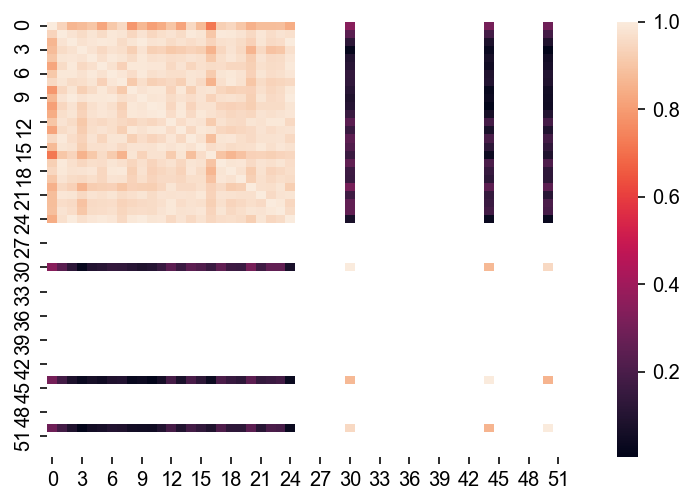

<Figure size 1440x1440 with 0 Axes>

In [373]:
#mm = pd.concat([df111, df112, df113], axis=0)
#nn = mm.pivot_table("count", "지명", aggfunc=np.sum)
#nn
sns.heatmap(ppp)
fig = plt.figure()
fig.set_size_inches(20, 20)

In [377]:
mm.corr()

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
지명,,,,,,,,,,,,,,,,,,,,,
강남구,1.000000,0.939126,0.861061,0.877635,0.899681,0.823041,0.910304,0.949951,0.789216,0.866870,...,0.303396,0.378214,0.335930,0.325200,0.367627,0.312422,0.286107,0.395620,0.331831,0.320605
강동구,0.939126,1.000000,0.977737,0.958411,0.982585,0.959545,0.990736,0.983819,0.947991,0.978845,...,0.183868,0.220768,0.206407,0.201989,0.154230,0.176697,0.183234,0.177836,0.171155,0.182308
강북구,0.861061,0.977737,1.000000,0.974109,0.987877,0.992396,0.988912,0.958890,0.982202,0.997876,...,0.082938,0.092499,0.100152,0.100263,-0.062387,0.072752,0.090001,-0.038749,-0.010333,0.069812
강서구,0.877635,0.958411,0.974109,1.000000,0.978784,0.951649,0.975316,0.967900,0.929618,0.977323,...,0.034232,0.014994,0.015922,0.013582,-0.228223,0.000601,0.005489,-0.171411,-0.158968,-0.013022
관악구,0.899681,0.982585,0.987877,0.978784,1.000000,0.972238,0.995696,0.982397,0.959306,0.992162,...,0.064825,0.089319,0.079100,0.077282,-0.100171,0.053858,0.052462,-0.078228,-0.084289,0.059198
광진구,0.823041,0.959545,0.992396,0.951649,0.972238,1.000000,0.975805,0.933691,0.990489,0.990677,...,0.047118,0.067376,0.082818,0.080146,-0.058715,0.045378,0.071071,-0.056343,-0.033572,0.044258
구로구,0.910304,0.990736,0.988912,0.975316,0.995696,0.975805,1.000000,0.986292,0.961942,0.993566,...,0.089135,0.128447,0.123358,0.121377,-0.018266,0.093901,0.097583,0.007219,-0.001212,0.096438
금천구,0.949951,0.983819,0.958890,0.967900,0.982397,0.933691,0.986292,1.000000,0.914163,0.967893,...,0.096790,0.146631,0.118220,0.117910,-0.013517,0.098483,0.090815,0.021419,-0.011523,0.102990
노원구,0.789216,0.947991,0.982202,0.929618,0.959306,0.990489,0.961942,0.914163,1.000000,0.980412,...,0.027470,0.050947,0.062069,0.061612,-0.102023,0.020694,0.053617,-0.109819,-0.060686,0.027388


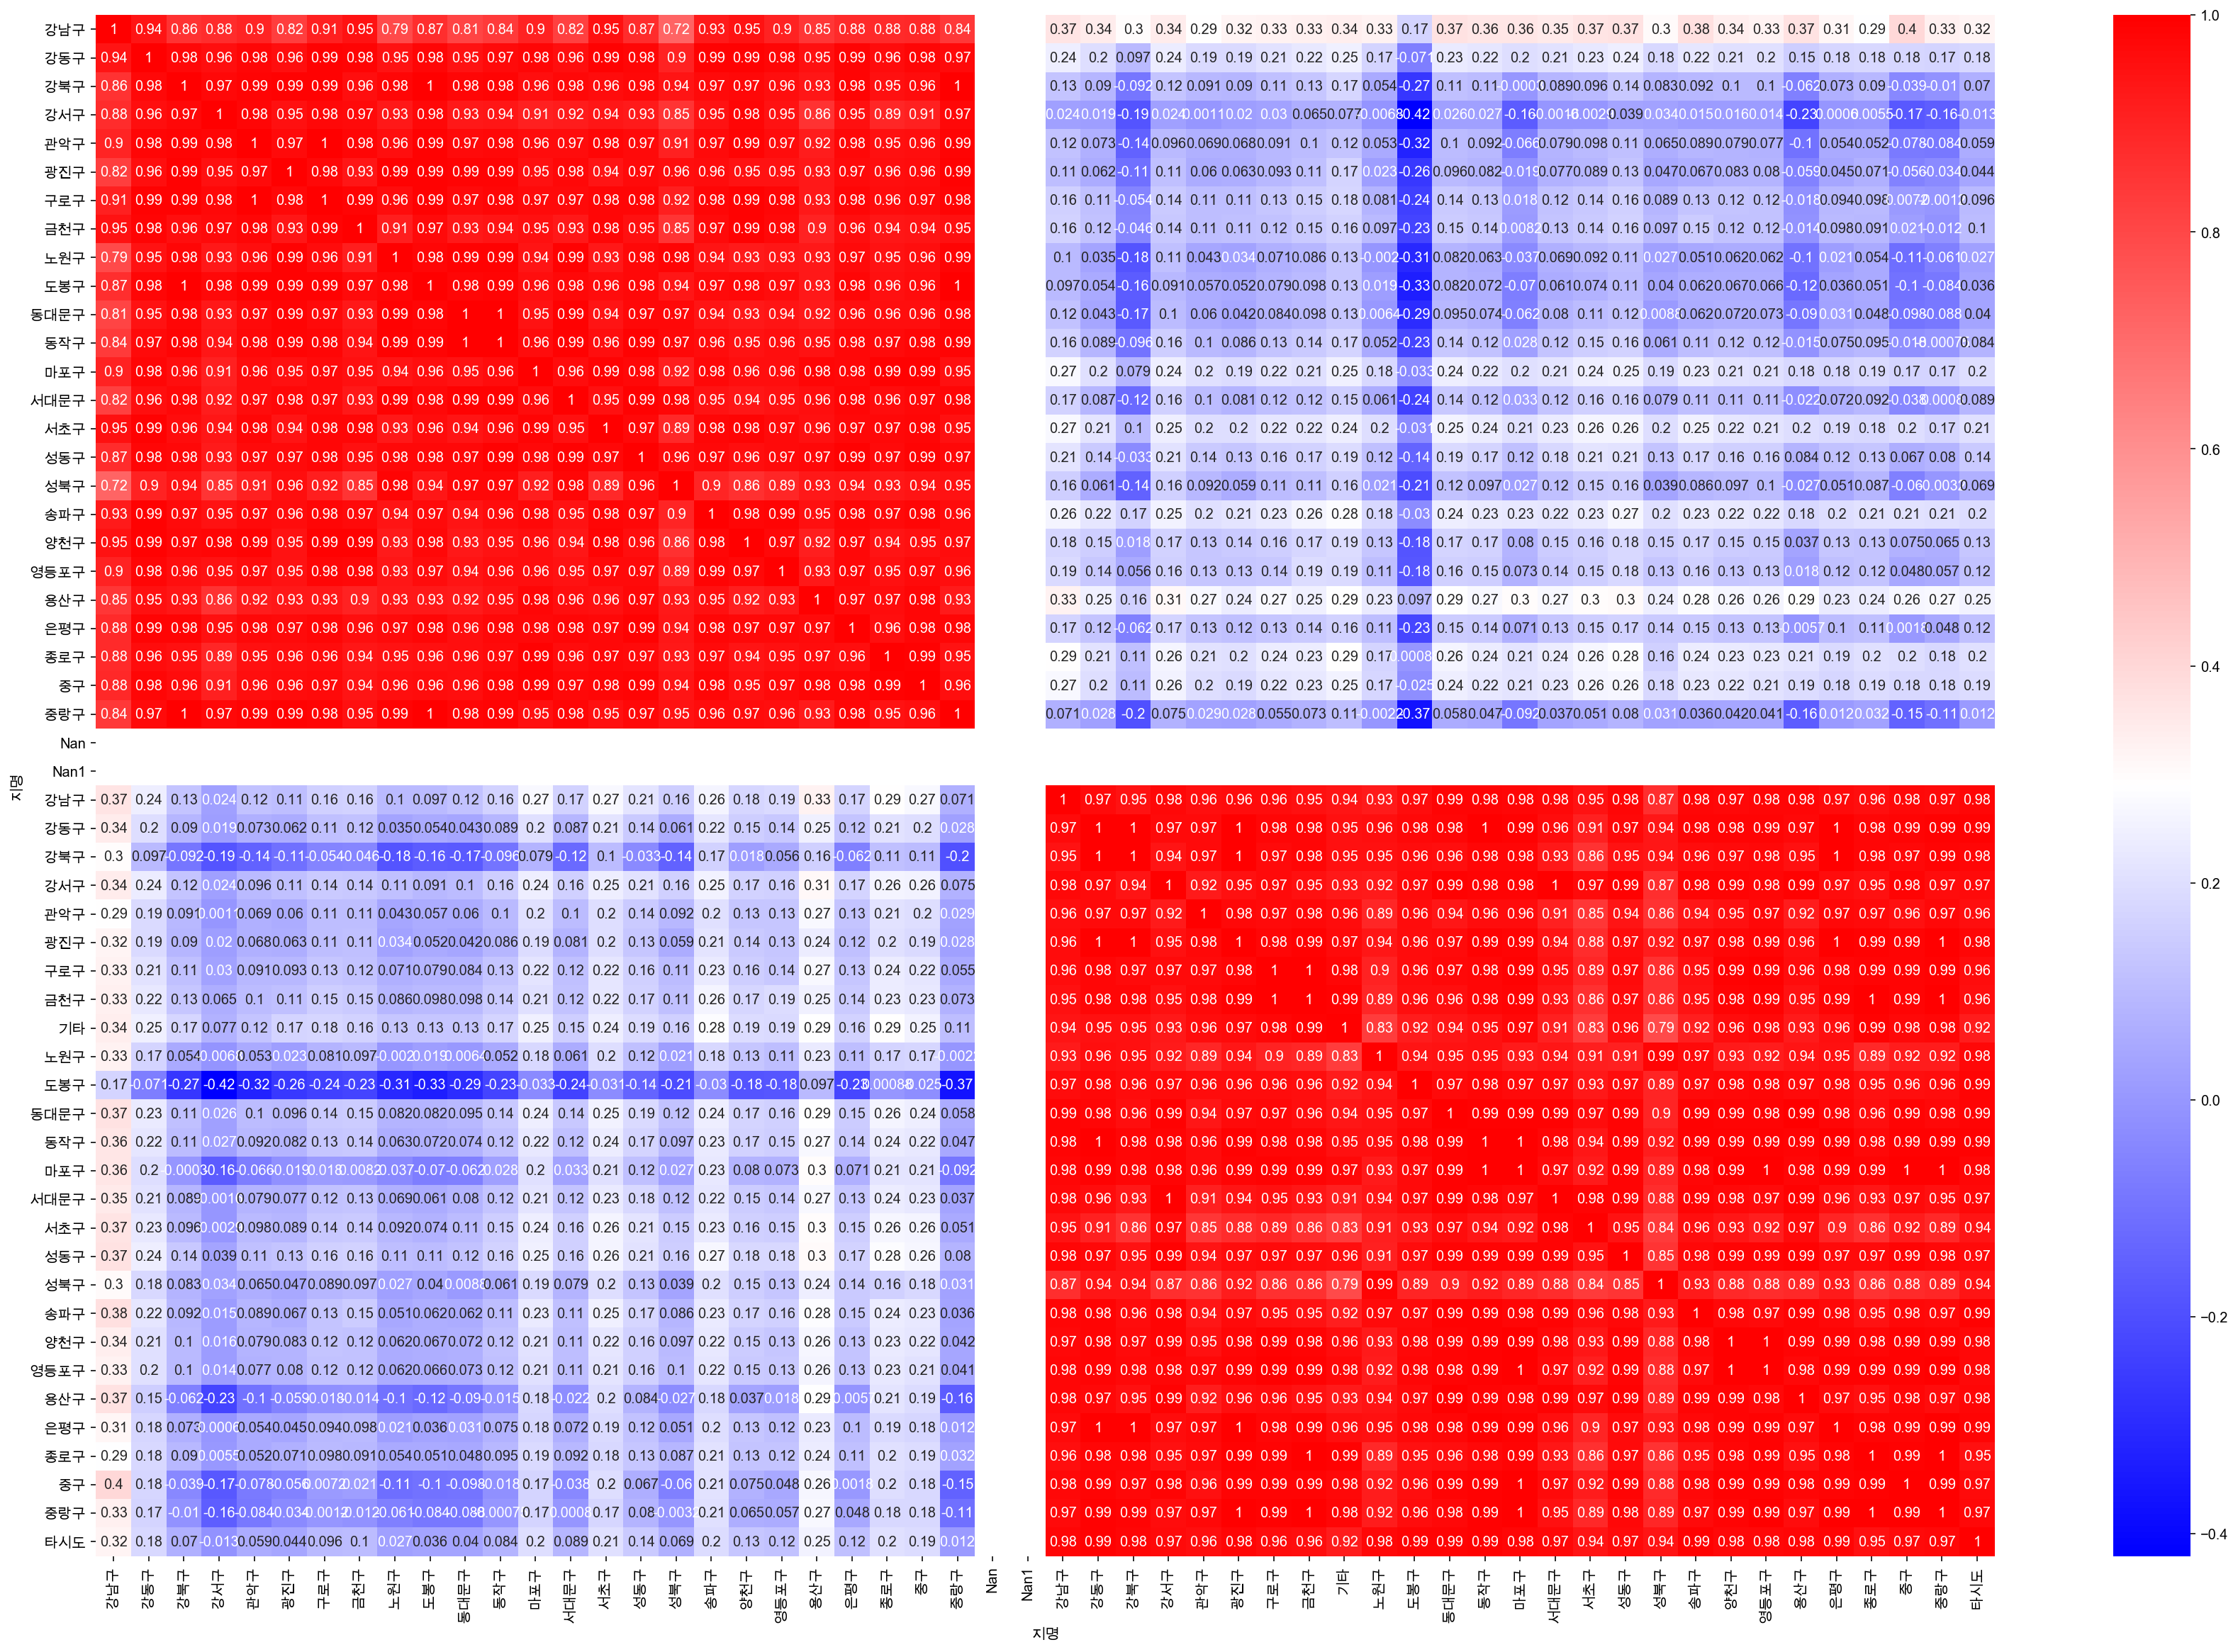

In [376]:
correlation_matrix = mm.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.show()

In [375]:
mm = pd.concat([df111, df113], axis=1)

TypeError: float() argument must be a string or a number, not 'DataFrame'

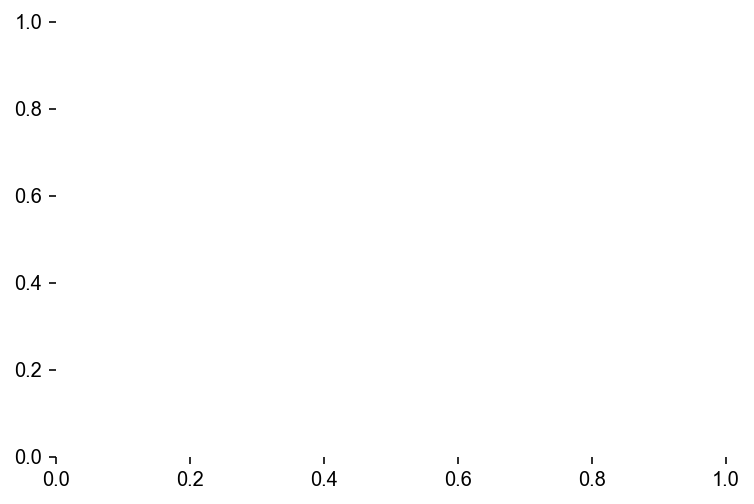

In [368]:
mm = pd.concat([df111, df113], axis=1)
#nn = mm.pivot_table("count", "지명")
#nn
sns.heatmap(df111, df113)
fig = plt.figure()
fig.set_size_inches(15, 15)

<AxesSubplot:ylabel='지명'>

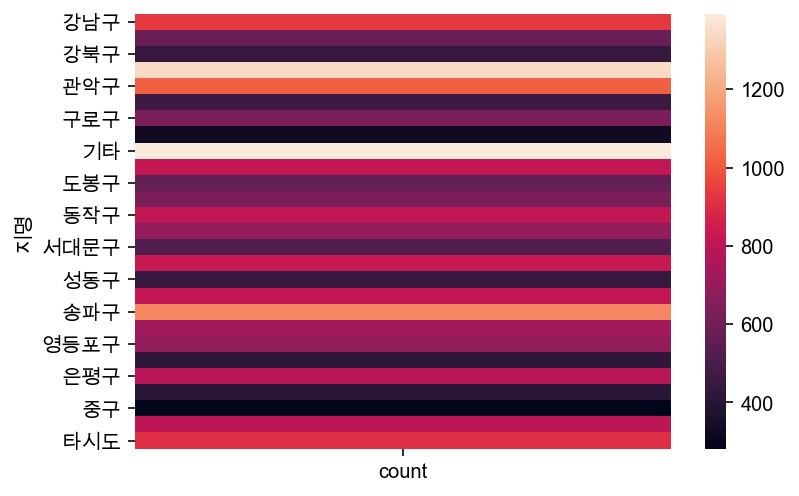

In [305]:
sns.heatmap(df113)

In [306]:
mm.T

지명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,기타,타시도
count,567110115.0,151357697.0,173227239.0,260342153.0,289329188.0,189518645.0,283206229.0,145667853.0,218803541.0,133857343.0,...,351362444.0,149487875.0,311535742.0,179181970.0,213541015.0,280859306.0,295154710.0,153829883.0,NaN,NaN
count,935.0,581.0,444.0,1341.0,1024.0,463.0,625.0,326.0,813.0,570.0,...,1118.0,726.0,694.0,418.0,787.0,404.0,282.0,802.0,1393.0,907.0


In [312]:
np.corrcoef(df111)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      